# CMPINF 2100: Midterm exam

## Arnab Dey Sarkar

### Assigned: Tuesday of Week 09 at 11:00PM 

### DUE: Tuesday of Week 10 at 11:59PM

You may add as many code and markdown cells as you see fit to answer the questions.

## You are NOT allowed to collaborate with anyone on this exam.

### Overview

You will demonstrate your ability to merge, group, summarize, visualize, and find patterns in data. This exam uses data associated with a manufacturing example. An overview of the goals, considerations, CSV files, and variables within the data is provided in a presentation on Canvas. Please read through those slides before starting the exam.

The data are provided in 5 separate CSV files. The CSV files are available on Canvas. You **MUST** download the files and save them to the same working directory as this notebook.

The specific instructions in this notebook tell you when you must JOIN the data together. Please read the problems carefully.

The overall objective of this exam is to JOIN data from multiple files in order to explore and find interesting patterns between the machine operating conditions and supplier information. You will report your findings within this notebook by displaying Pandas DataFrames and statistical visualizations via Seaborn and matplotlib when necessary.  

## Import modules

You are permitted to use the following modules on this exam.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

You may also use the following functions from scikit-learn on this exam.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

You may also use the following sub module from SCIPY.

In [3]:
from scipy.cluster import hierarchy

You are **NOT** permitted to use any other modules or functions. However, you **ARE** permitted to create your own user defined functions if you would like.

## Problem 01

The file names for the 3 machine data sets are provided as strings in the cell below. You are required to read in the CSV files and assign the data to the `m01_df`, `m02_df`, and `m03_df` objects. The data from machine 1 will therefore be associated with `m01_df`, machine 2 is associated with `m02_df`, and machine 3 is associated with `m03_df`.  

In this problem you must explore each of the three machine data sets. 

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in each data set? 
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:

* How many unique values for `Batch` are associated with each MACHINE (data set)?
* How many cell phone cases are associated with each `Batch` value for each MACHINE (data set)?
* Do the summary statistics of the OPERATING VARIABLES `x1` through `x4` vary across the three MACHINES?
* Do the summary statistics of the OPERATING VARIABLES `x1` through `x4` vary across the `Batch` values?
* Do the relationships between the OPERATING VARIABLES `x1` through `x4` vary across the three MACHINES?
* Do the relationships between the OPERATING VARIABLES `x1` through `x4` vary across the `Batch` values?

At the conclusion of this problem, you **MUST** CONCATENATE the 3 MACHINE data sets into a single DataFrame. The single DataFrame must be named `machine_df`. Before concatenating, you **MUST** add a column `machine_id` to each DataFrame with the correct index value for that machine (1, 2, or 3). The concatenating DataFrame variable name is provided as a reminder to you below. 

You may add as many markdown and code cells as you see fit to answer this question. Include markdown cells stating what you see in the figures and why you selected to use them.

#### SOLUTION

In [4]:
# Define the files's for the 3 machine level CSV files

file_m01 = 'midterm_machine_01.csv'

file_m02 = 'midterm_machine_02.csv'

file_m03 = 'midterm_machine_03.csv'

In [5]:
# read in the CSV files and name them accordingly

m01_df = pd.read_csv(file_m01)

m02_df = pd.read_csv(file_m02)

m03_df = pd.read_csv(file_m03)

In [8]:
print(m01_df.shape)
print(m02_df.shape)
print(m03_df.shape)


(5152, 7)
(5119, 7)
(4458, 7)


In [9]:
print(m01_df.dtypes)
print(m02_df.dtypes)
print(m03_df.dtypes)


ID        object
Batch      int64
s_id       int64
x1       float64
x2       float64
x3       float64
x4       float64
dtype: object
ID        object
Batch      int64
s_id       int64
x1       float64
x2       float64
x3       float64
x4       float64
dtype: object
ID        object
Batch      int64
s_id       int64
x1       float64
x2       float64
x3       float64
x4       float64
dtype: object


In [10]:
print(m01_df.nunique())
print(m02_df.nunique())
print(m03_df.nunique())


ID       5152
Batch      50
s_id      149
x1       5152
x2       5152
x3       5152
x4       5152
dtype: int64
ID       5119
Batch      50
s_id      133
x1       5119
x2       5119
x3       5119
x4       5119
dtype: int64
ID       4458
Batch      41
s_id      141
x1       4458
x2       4458
x3       4458
x4       4458
dtype: int64


In [11]:
print(m01_df.isna().sum())
print(m02_df.isna().sum())
print(m03_df.isna().sum())

ID       0
Batch    0
s_id     0
x1       0
x2       0
x3       0
x4       0
dtype: int64
ID       0
Batch    0
s_id     0
x1       0
x2       0
x3       0
x4       0
dtype: int64
ID       0
Batch    0
s_id     0
x1       0
x2       0
x3       0
x4       0
dtype: int64


### Machine 1

In [33]:
m01_df.head()

ID  Batch  s_id         x1          x2         x3         x4
0  B001-M01-S001      1     1  50.117118  102.167346  22.067812  13.889524
1  B001-M01-S002      1     2  46.887333  112.266102  23.197330  13.064709
2  B001-M01-S003      1     3  50.132744  103.674908  22.319933  13.647482
3  B001-M01-S004      1     4  48.501042  107.143156  22.162947  14.077758
4  B001-M01-S005      1     5  49.690442  102.120283  22.248696  13.728666

In [40]:
m01_df['Batch']=m01_df.Batch.astype('category')
m01_df['s_id']=m01_df.s_id.astype('category')
m01_df['ID']=m01_df.ID.astype('category')

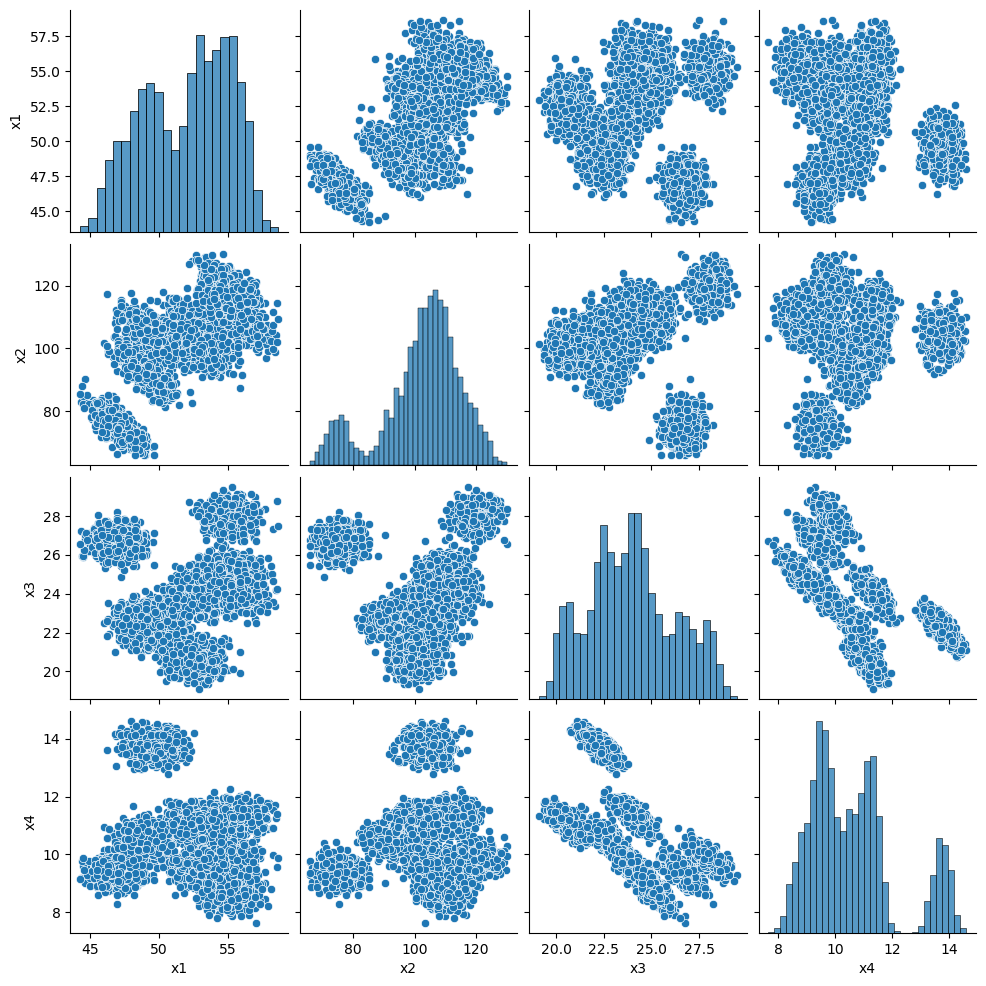

In [287]:
sns.pairplot(data=m01_df, diag_kws={'common_bins': False,'common_norm': False})

plt.show()

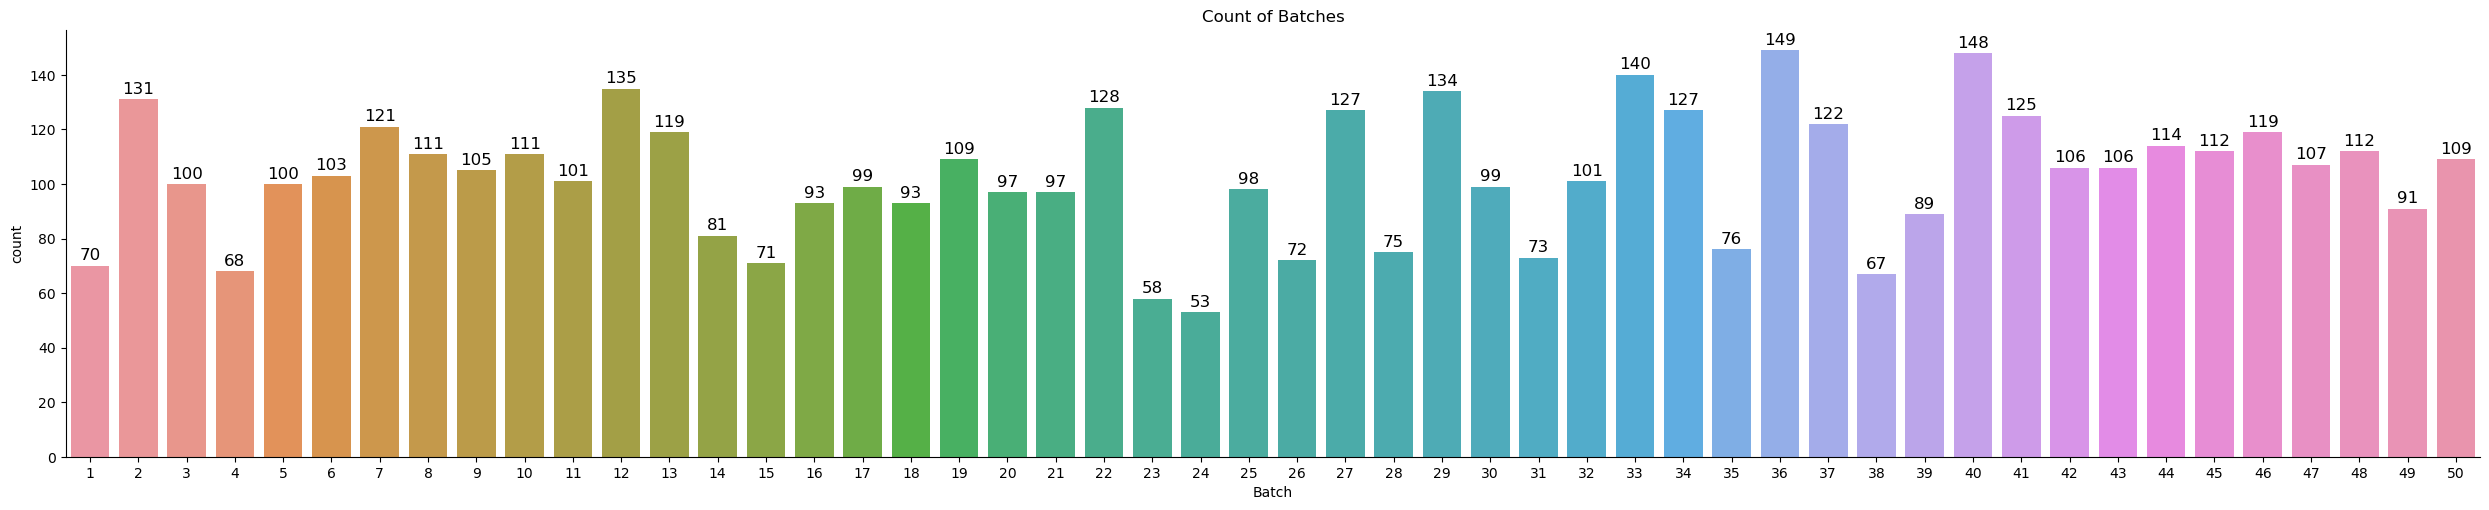

In [37]:
ax= sns.catplot(data=m01_df, x='Batch', kind='count', aspect=5)

counts = m01_df['Batch'].value_counts().sort_index()
for i, count in enumerate(counts):
    ax.ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

# Set plot title
plt.title('Count of Batches')

plt.show()

In [50]:
m01_df_cat_col = m01_df.select_dtypes('category').copy().columns.to_list()

In [51]:
m01_df_features_col = m01_df.select_dtypes('number').columns.copy()


In [52]:
m01_lf = m01_df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=m01_df_cat_col+['rowid'], value_vars=m01_df_features_col)


In [54]:
m01_lf.head()

ID Batch s_id  rowid variable      value
0  B001-M01-S001     1    1      0       x1  50.117118
1  B001-M01-S002     1    2      1       x1  46.887333
2  B001-M01-S003     1    3      2       x1  50.132744
3  B001-M01-S004     1    4      3       x1  48.501042
4  B001-M01-S005     1    5      4       x1  49.690442

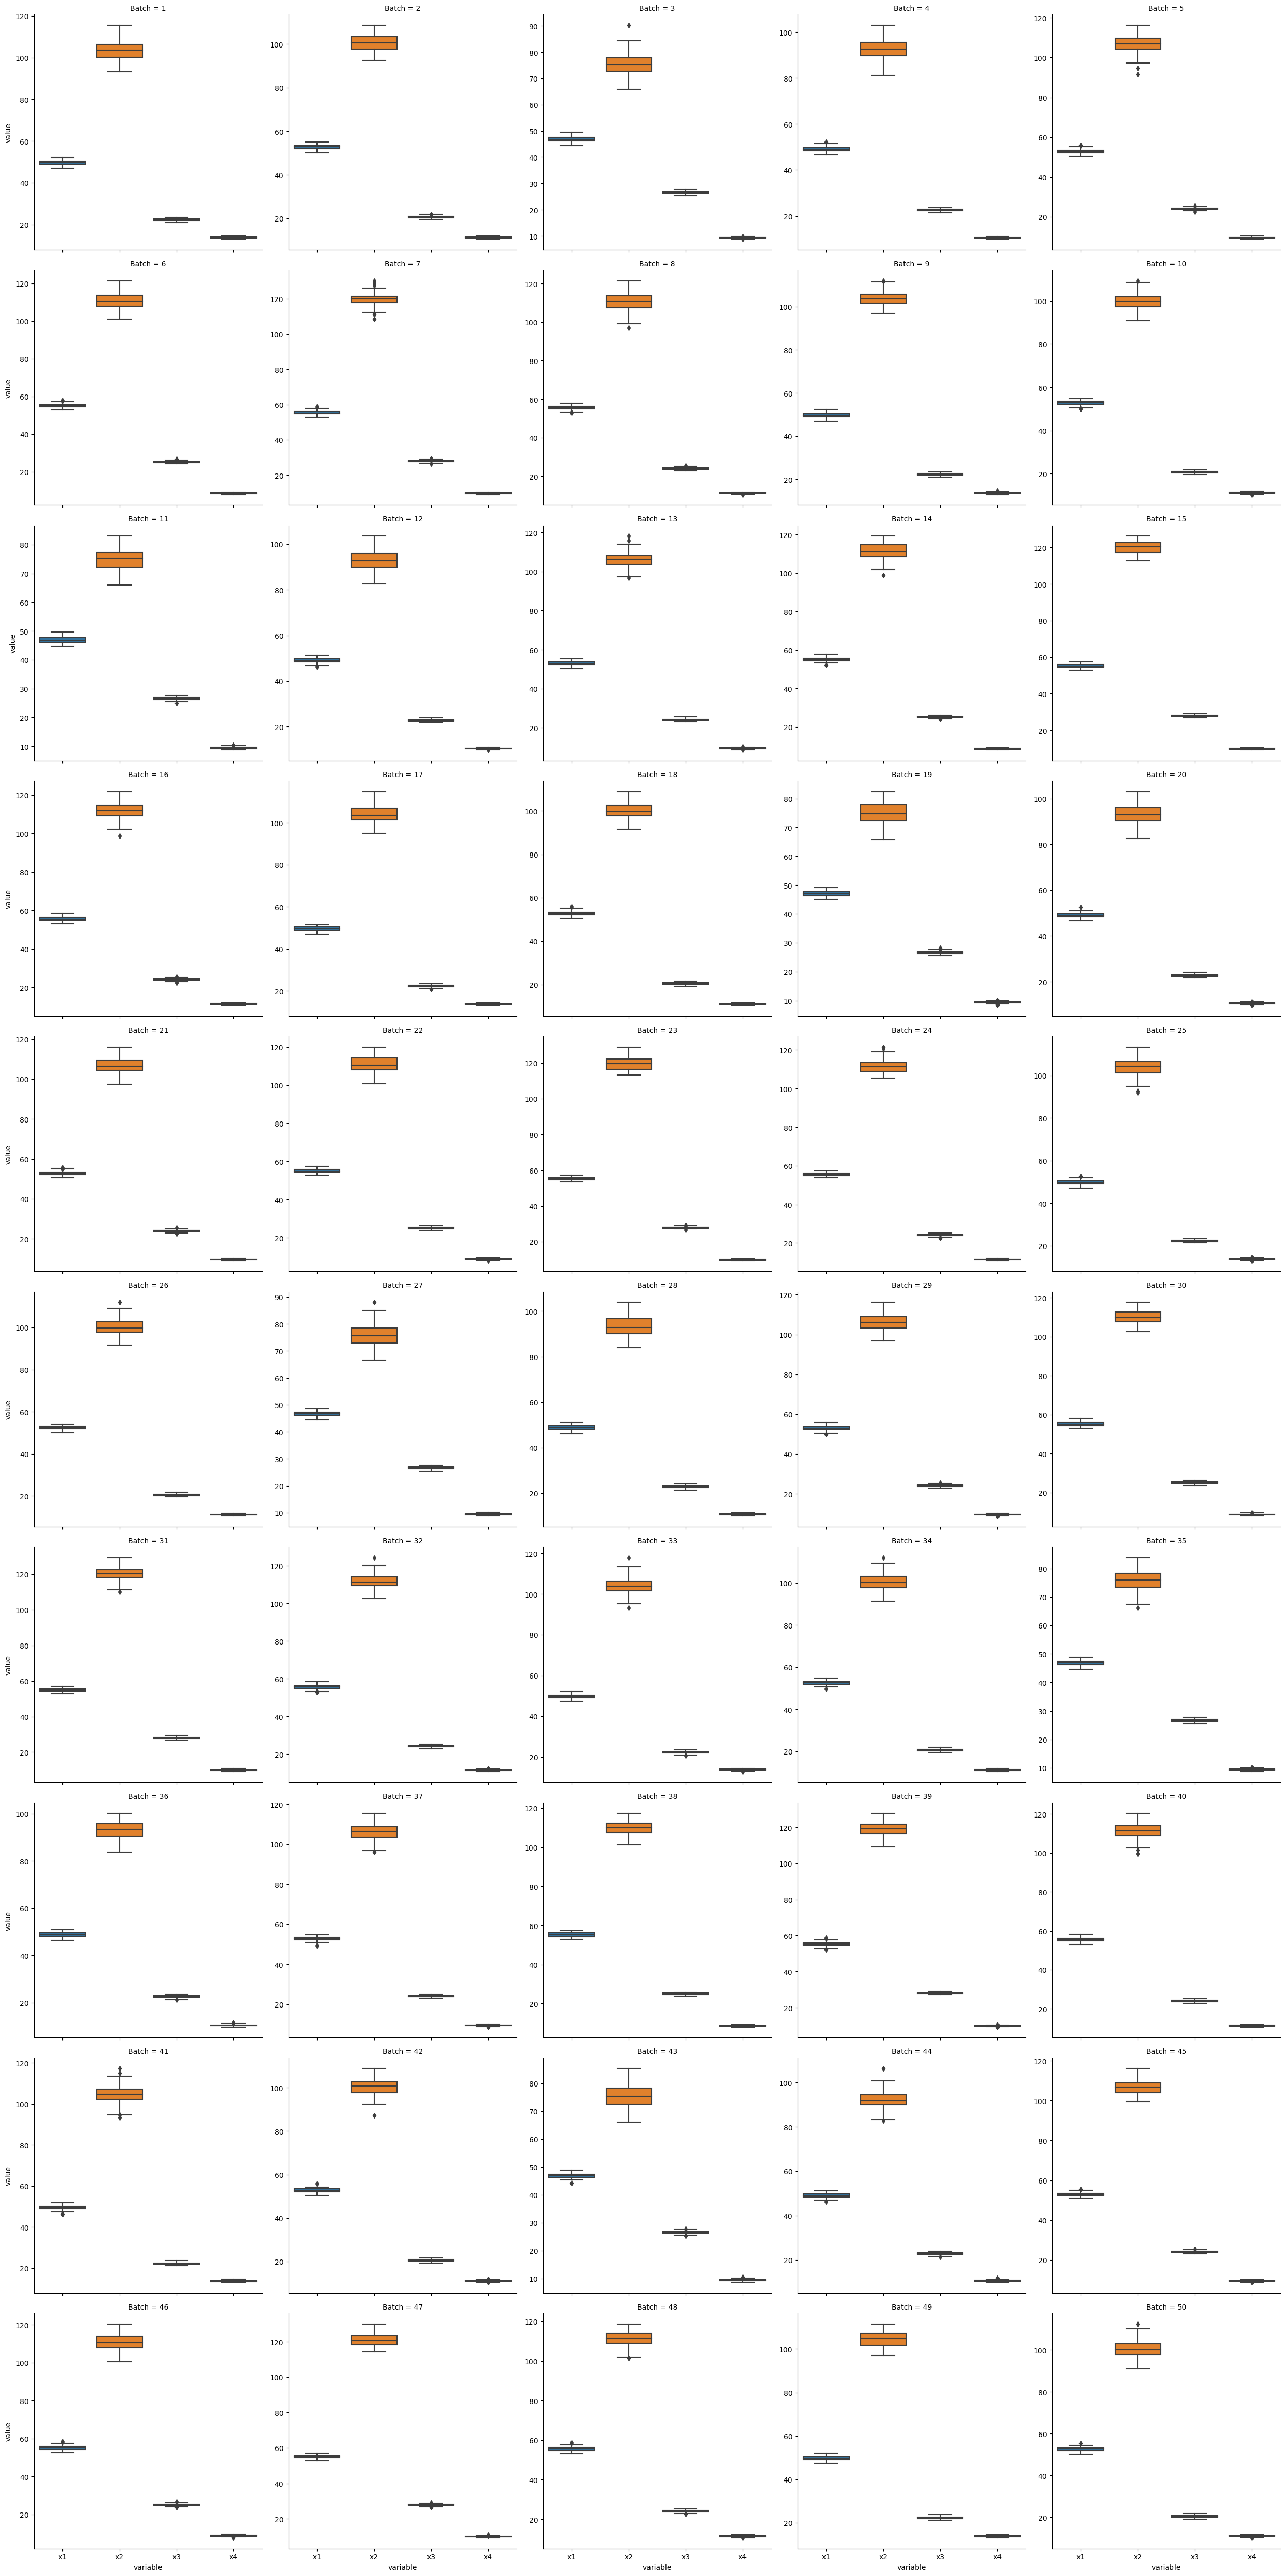

In [63]:
sns.catplot(data=m01_lf, x='variable',y='value', col='Batch', kind='box', col_wrap=5,sharey=False)

plt.show()

The summary statistics of the OPERATING VARIABLES x1 through x4 vary among among each other but the boxplots are similar across the Batch values in machine 1.

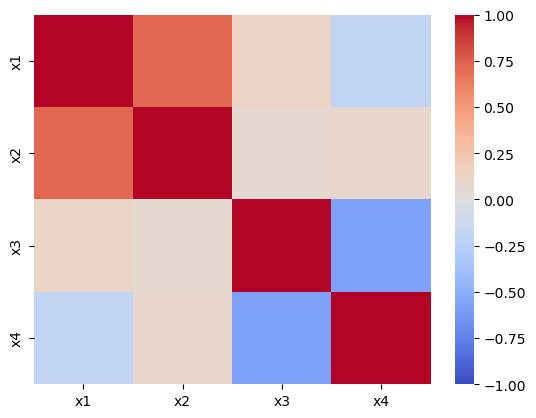

In [78]:
fig, ax=plt.subplots()

sns.heatmap(data=m01_df.corr(numeric_only=True), vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)

plt.show()

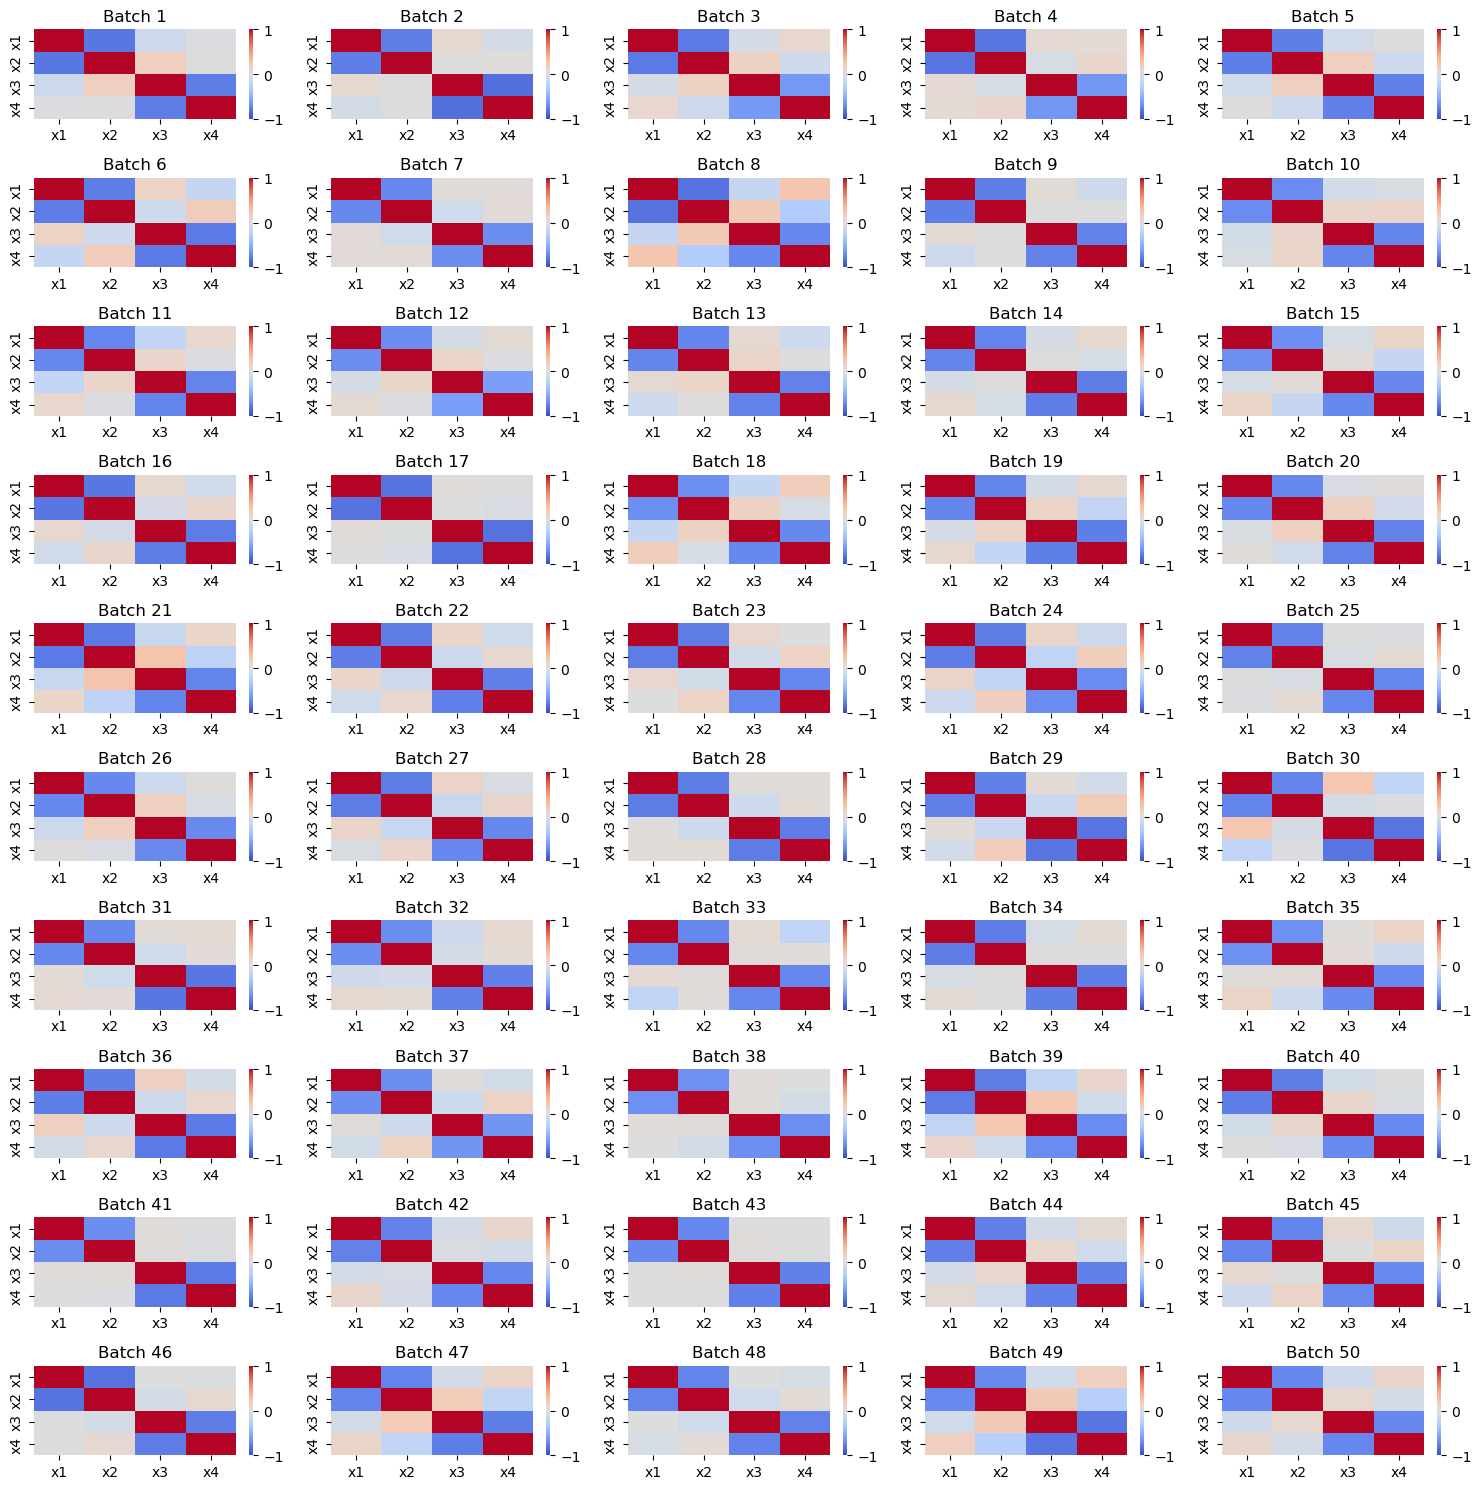

In [77]:
# Get unique values of 'Batch'
batch_values = m01_df['Batch'].unique()

# Define the number of rows and columns for subplots
num_rows = 10
num_cols = 5

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Calculate and plot correlation heatmaps for each 'Batch' group
for i, batch in enumerate(batch_values):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    subset_df = m01_df[m01_df['Batch'] == batch]
    corr_matrix = subset_df.corr(numeric_only=True)
    
    sns.heatmap(data=corr_matrix, vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)
    ax.set_title(f'Batch {batch}')
    #ax.axis('off')  # Turn off axis labels and ticks

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

What we can see that we have strong correlation between (x1,x2) and (x3,x4), they are strongly correlated accross batches as well. 

### Machine 2

In [79]:
m02_df.head()

ID  Batch  s_id         x1          x2         x3         x4
0  B001-M02-S001      1     1  50.213596  100.053754  22.027835  13.839467
1  B001-M02-S002      1     2  49.811232  101.161409  22.436839  13.878907
2  B001-M02-S003      1     3  48.968142  106.184030  22.414990  13.847003
3  B001-M02-S004      1     4  50.477133  107.949816  21.909720  14.193081
4  B001-M02-S005      1     5  50.188501  102.882549  22.306728  13.693529

In [80]:
m02_df['Batch']=m02_df.Batch.astype('category')
m02_df['s_id']=m02_df.s_id.astype('category')
m02_df['ID']=m02_df.ID.astype('category')

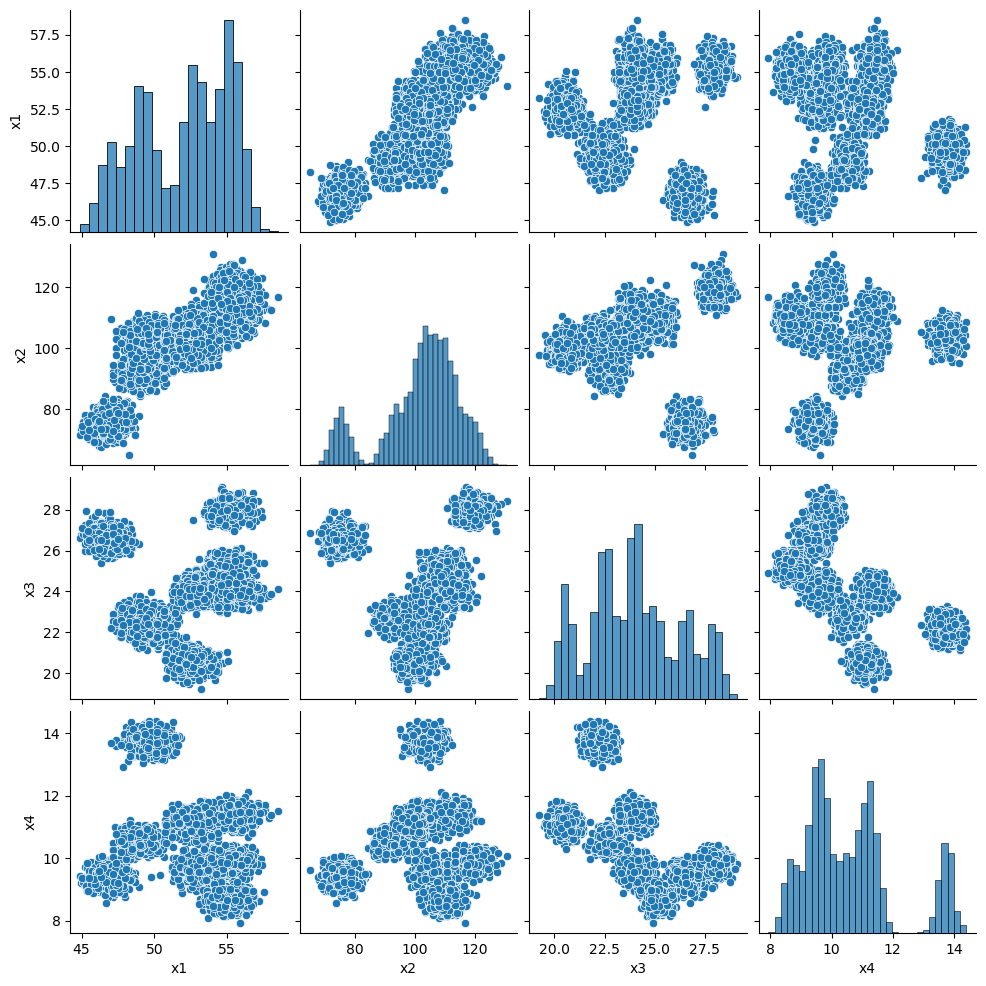

In [286]:
sns.pairplot(data=m02_df, diag_kws={'common_bins': False,'common_norm': False})

plt.show()

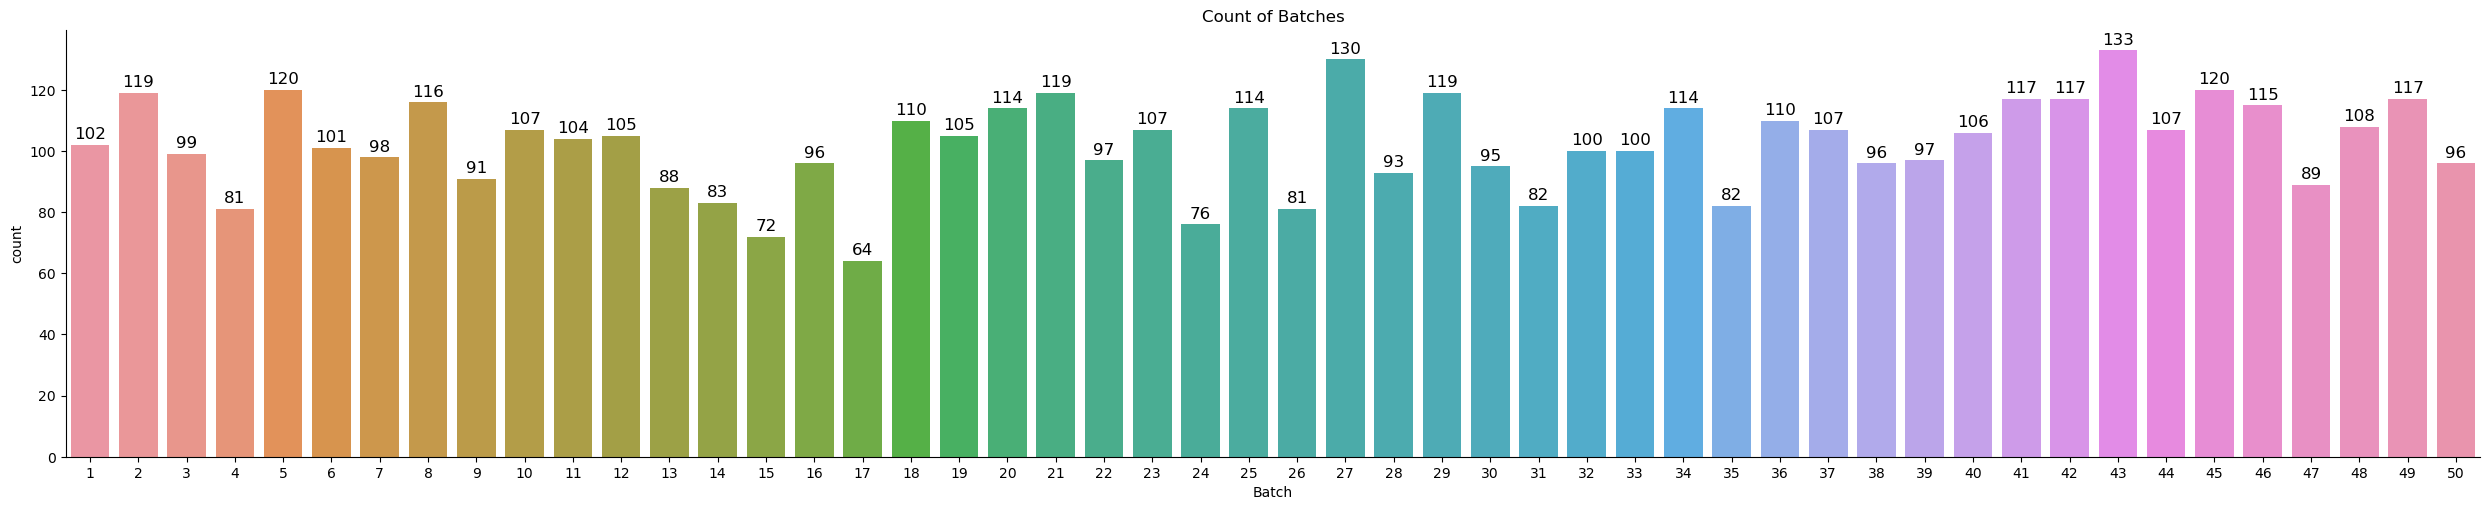

In [82]:
ax= sns.catplot(data=m02_df, x='Batch', kind='count', aspect=5)

counts = m02_df['Batch'].value_counts().sort_index()
for i, count in enumerate(counts):
    ax.ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

# Set plot title
plt.title('Count of Batches')

plt.show()

In [85]:
m02_df_cat_col = m02_df.select_dtypes('category').copy().columns.to_list()

In [86]:
m02_df_features_col = m02_df.select_dtypes('number').columns.copy()


In [87]:
m02_lf = m02_df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=m02_df_cat_col+['rowid'], value_vars=m02_df_features_col)


In [88]:
m02_lf.head()

ID Batch s_id  rowid variable      value
0  B001-M02-S001     1    1      0       x1  50.213596
1  B001-M02-S002     1    2      1       x1  49.811232
2  B001-M02-S003     1    3      2       x1  48.968142
3  B001-M02-S004     1    4      3       x1  50.477133
4  B001-M02-S005     1    5      4       x1  50.188501

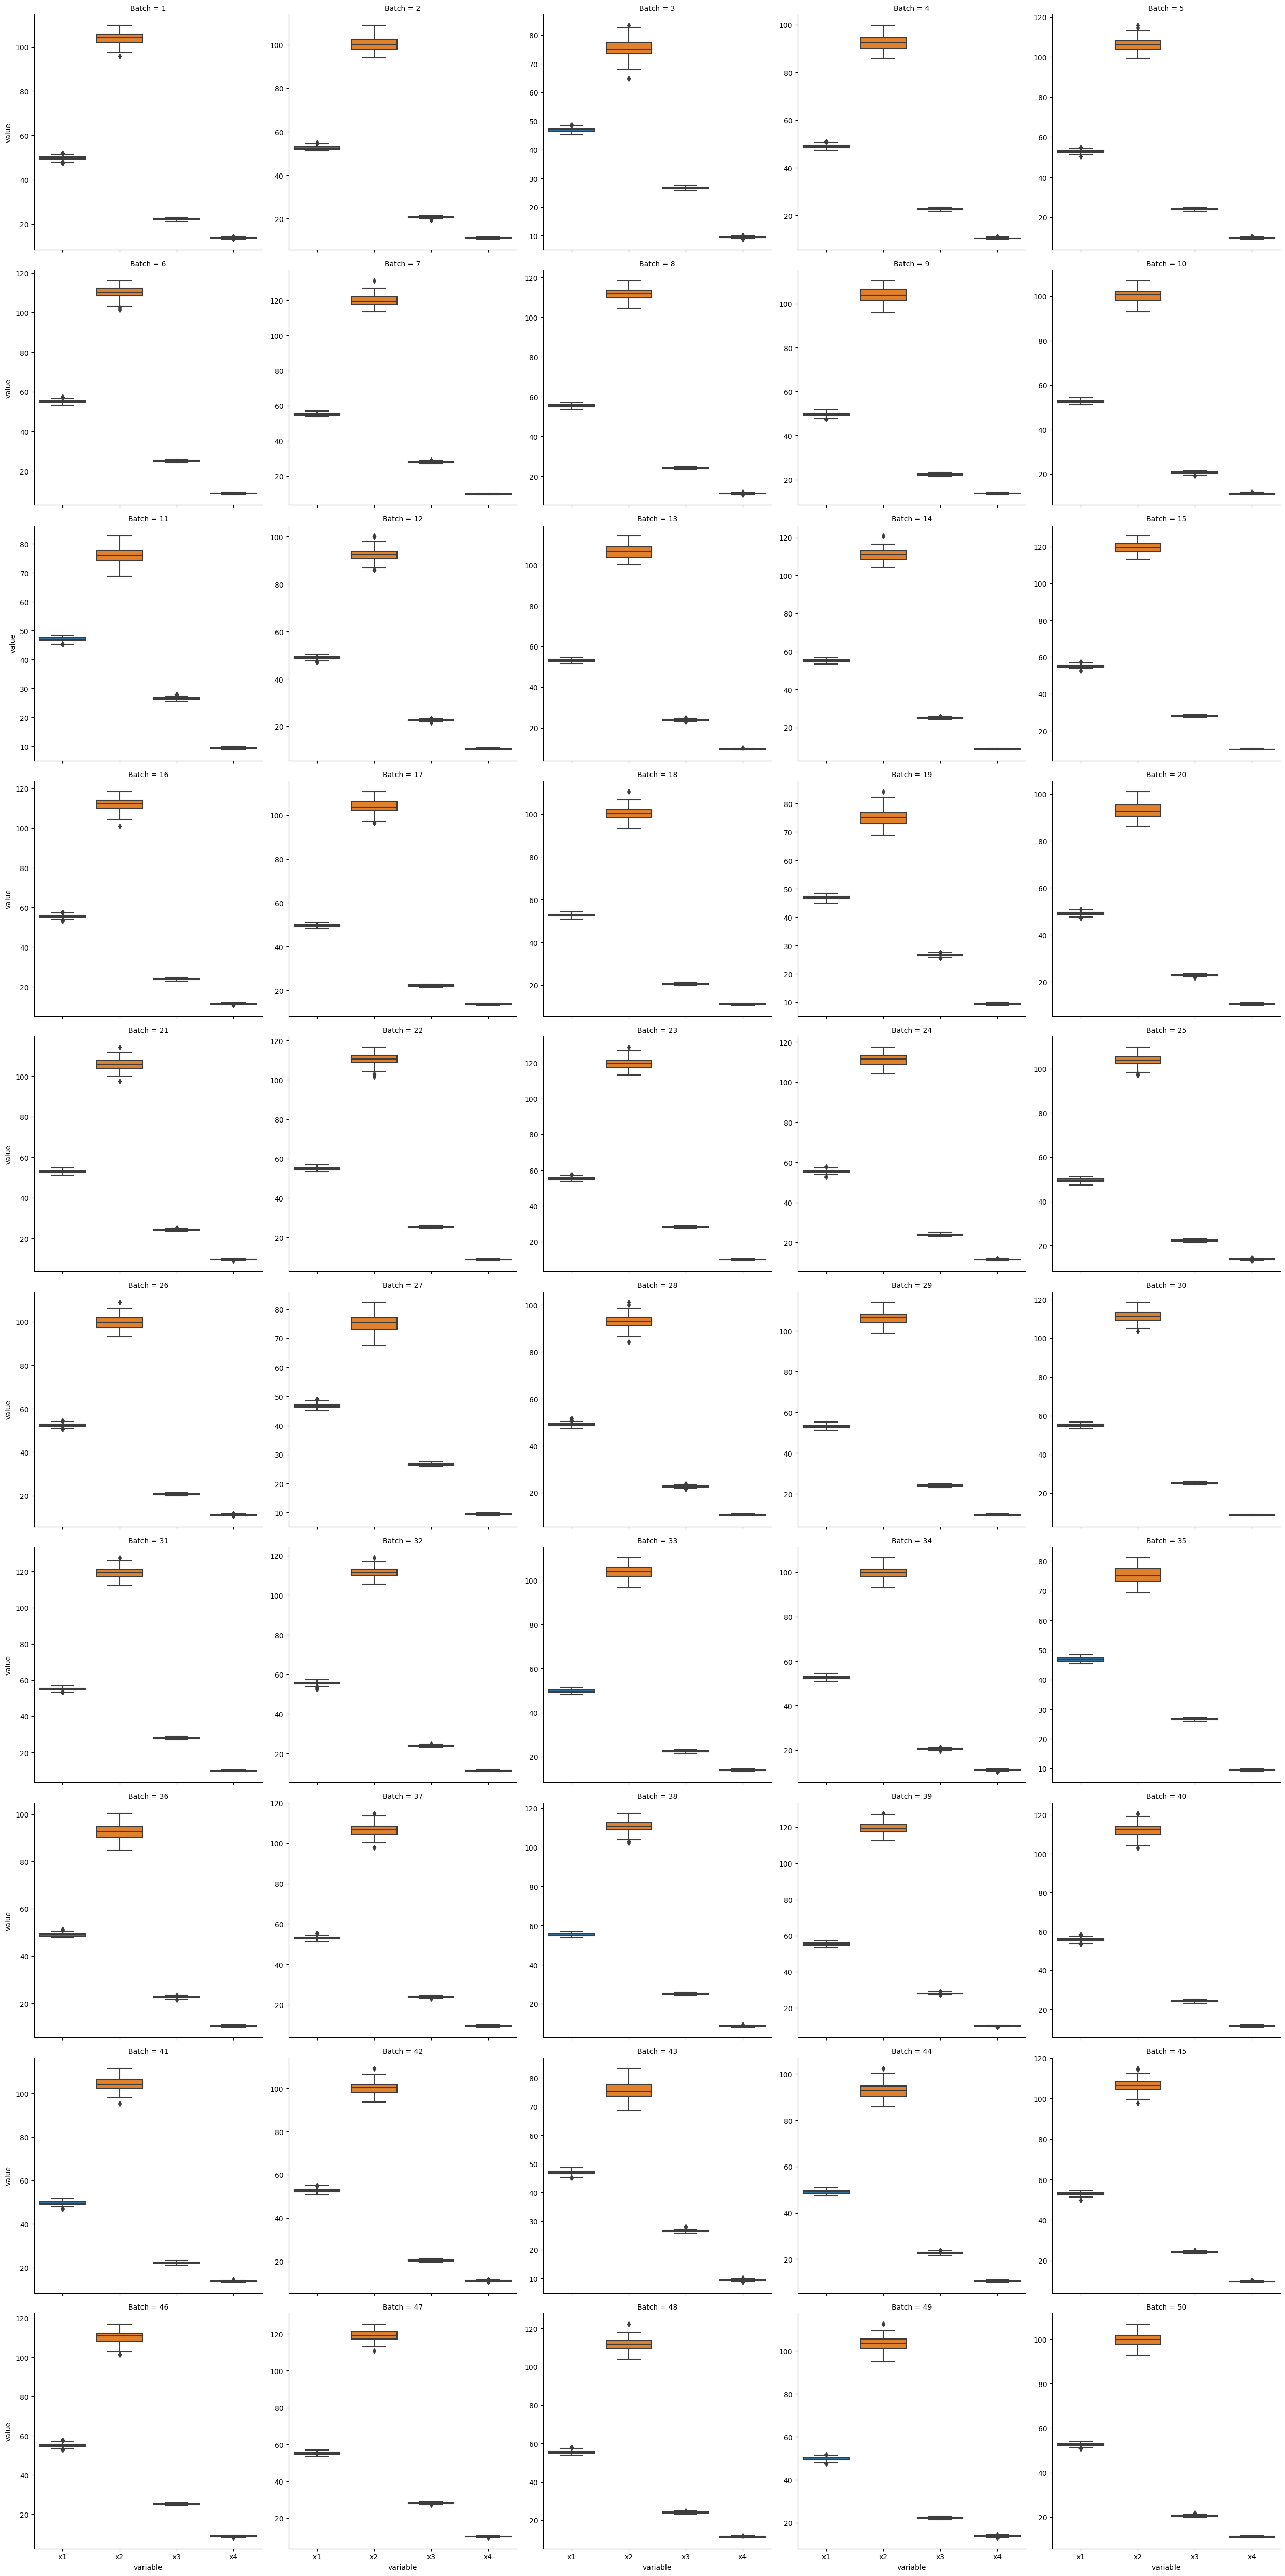

In [89]:
sns.catplot(data=m02_lf, x='variable',y='value', col='Batch', kind='box', col_wrap=5,sharey=False)

plt.show()

The summary statistics of the OPERATING VARIABLES x1 through x4 vary among among each other but the boxplots are similar across the Batch values in machine 2.

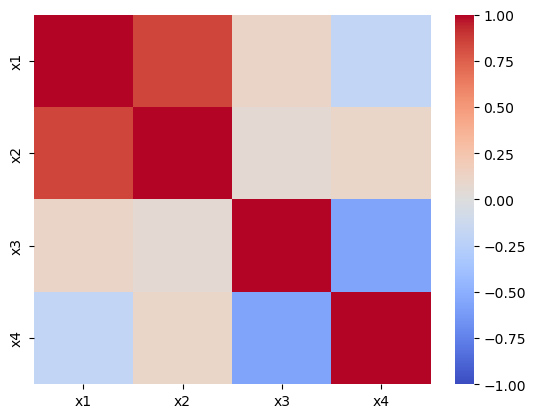

In [90]:
fig, ax=plt.subplots()

sns.heatmap(data=m02_df.corr(numeric_only=True), vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)

plt.show()

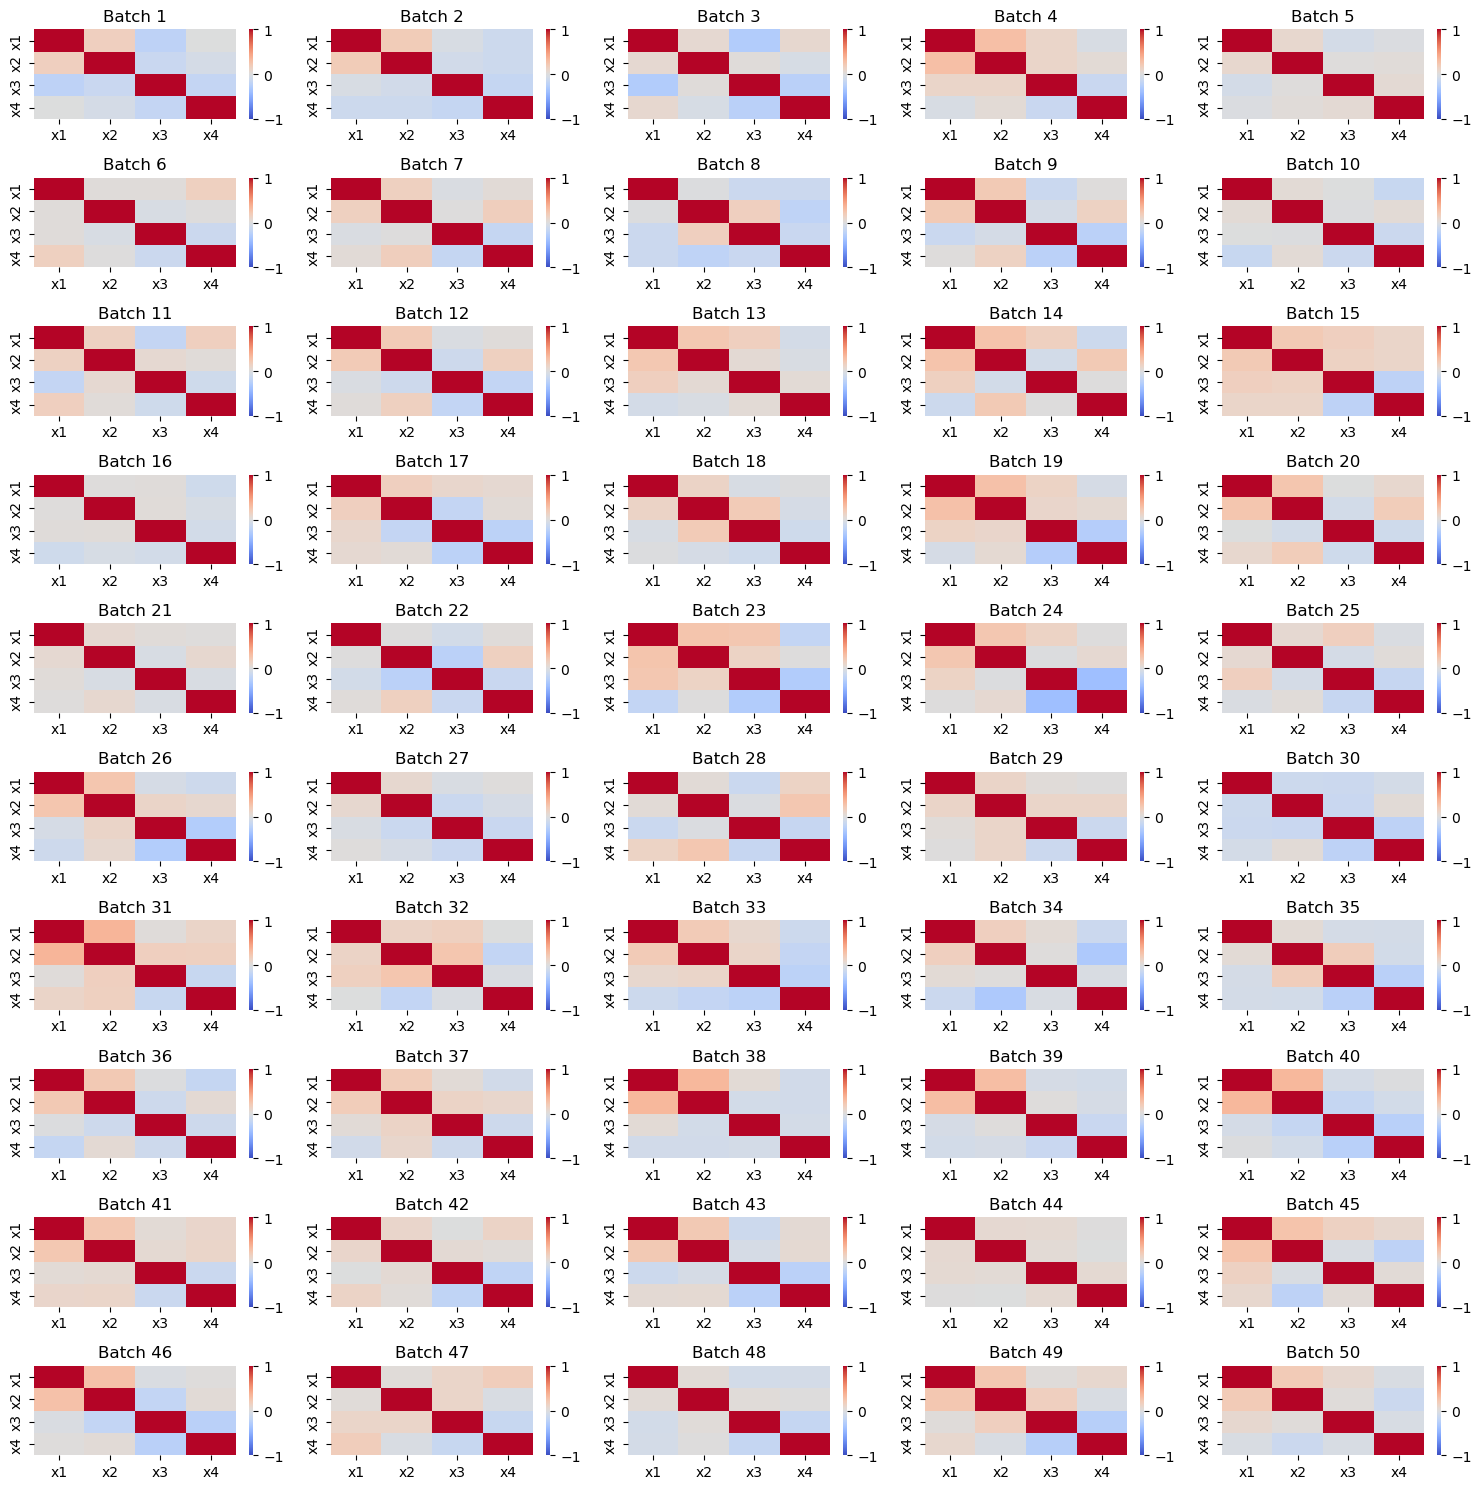

In [91]:
# Get unique values of 'Batch'
batch_values = m02_df['Batch'].unique()

# Define the number of rows and columns for subplots
num_rows = 10
num_cols = 5

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Calculate and plot correlation heatmaps for each 'Batch' group
for i, batch in enumerate(batch_values):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    subset_df = m02_df[m02_df['Batch'] == batch]
    corr_matrix = subset_df.corr(numeric_only=True)
    
    sns.heatmap(data=corr_matrix, vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)
    ax.set_title(f'Batch {batch}')
    #ax.axis('off')  # Turn off axis labels and ticks

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

What we can see that we have strong correlation between (x1,x2) and (x3,x4) in machine 2 but, they are weakly positively correlated accross batches.

### Machine 3

In [92]:
m03_df.head()

ID  Batch  s_id         x1          x2         x3         x4
0  B001-M03-S001      1     1  49.317142  103.793803  21.848400  13.539224
1  B001-M03-S002      1     2  49.983523  106.266817  22.530393  13.741064
2  B001-M03-S003      1     3  48.762702   98.864632  22.462081  13.818300
3  B001-M03-S004      1     4  50.009580  104.689498  22.369850  13.849127
4  B001-M03-S005      1     5  48.892358  102.974600  22.657941  13.795078

In [93]:
m03_df['Batch']=m03_df.Batch.astype('category')
m03_df['s_id']=m03_df.s_id.astype('category')
m03_df['ID']=m03_df.ID.astype('category')

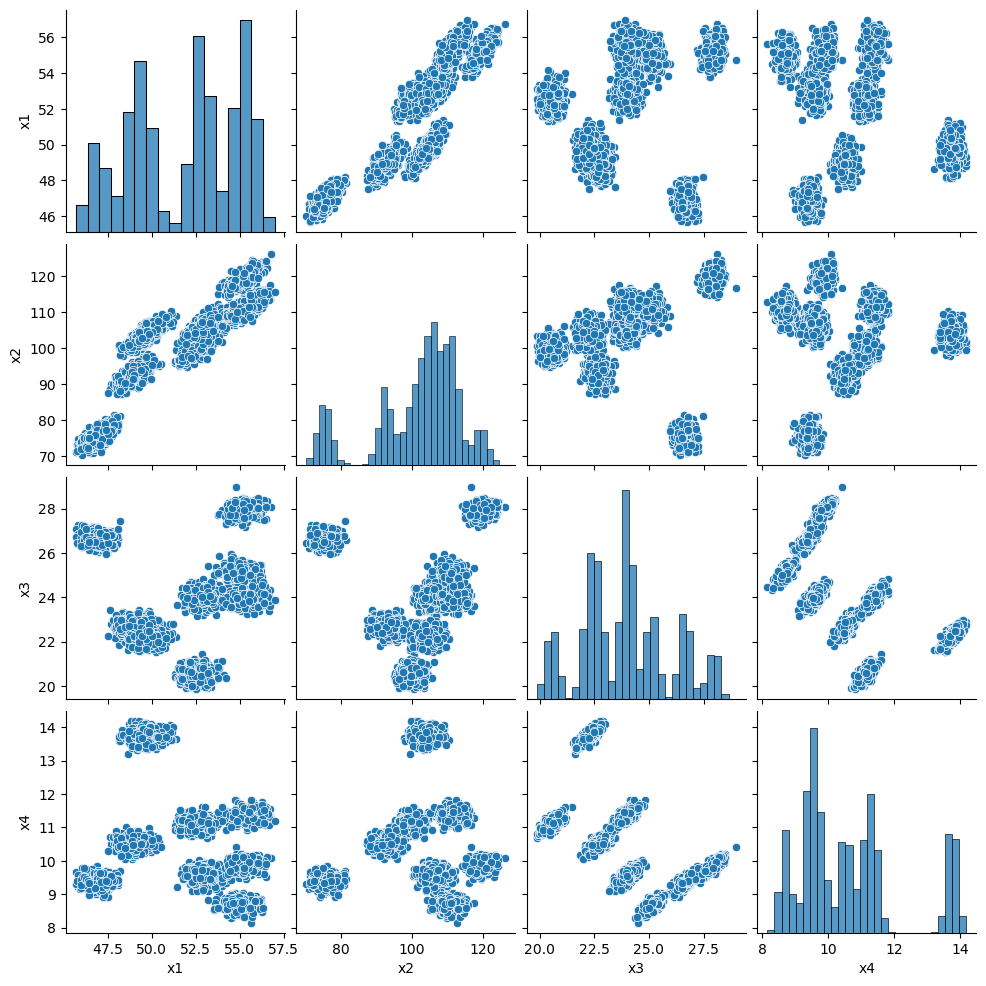

In [285]:
sns.pairplot(data=m03_df, diag_kws={'common_bins': False,'common_norm': False})

plt.show()

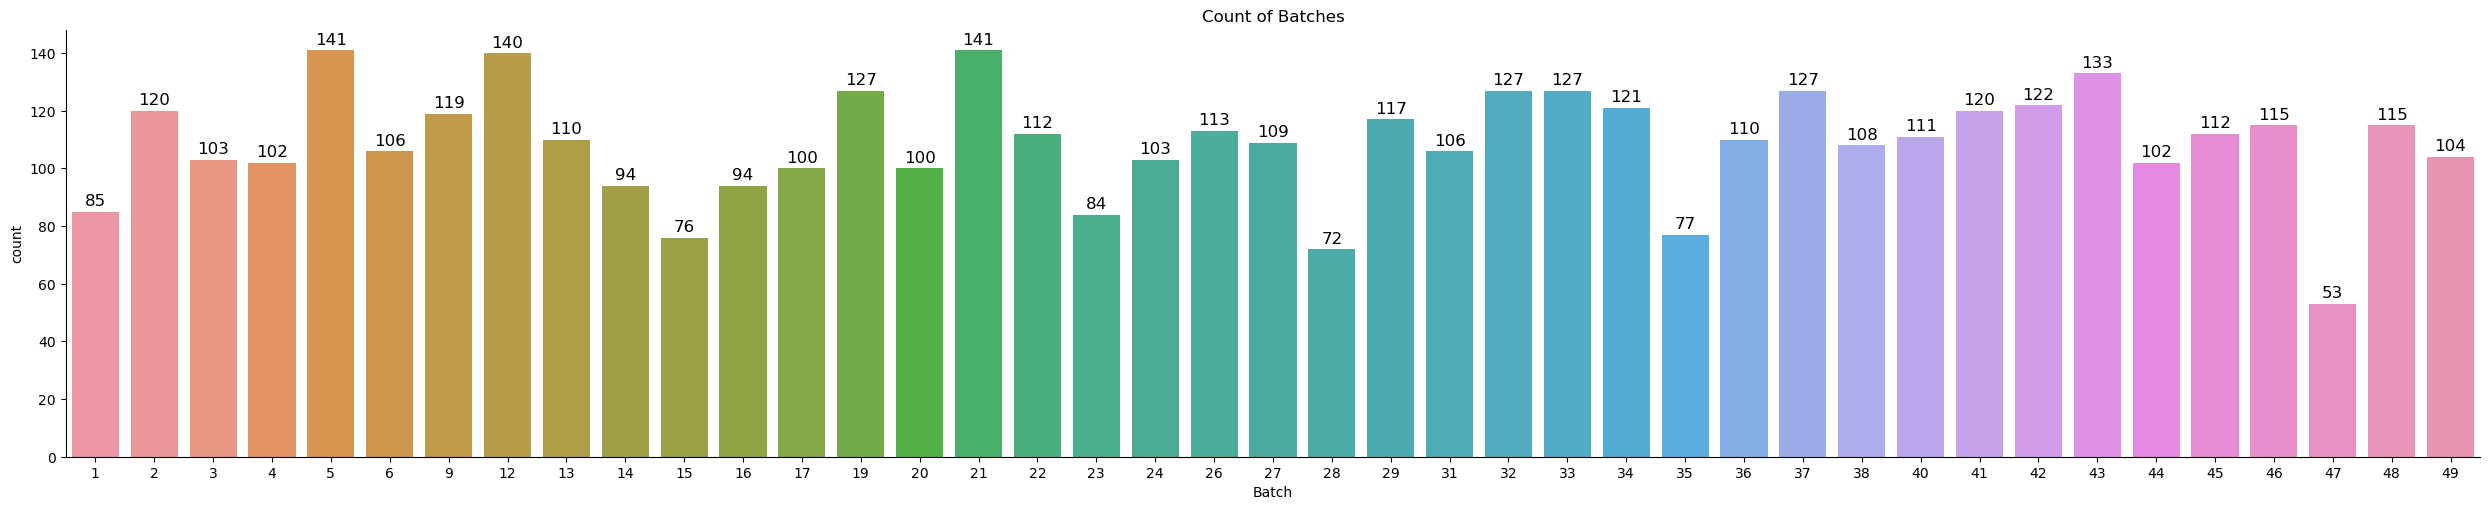

In [95]:
ax= sns.catplot(data=m03_df, x='Batch', kind='count', aspect=5)

counts = m03_df['Batch'].value_counts().sort_index()
for i, count in enumerate(counts):
    ax.ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

# Set plot title
plt.title('Count of Batches')

plt.show()

In [96]:
m03_df_cat_col = m03_df.select_dtypes('category').copy().columns.to_list()

In [97]:
m03_df_features_col = m01_df.select_dtypes('number').columns.copy()


In [98]:
m03_lf = m03_df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=m03_df_cat_col+['rowid'], value_vars=m03_df_features_col)


In [99]:
m03_lf.head()

ID Batch s_id  rowid variable      value
0  B001-M03-S001     1    1      0       x1  49.317142
1  B001-M03-S002     1    2      1       x1  49.983523
2  B001-M03-S003     1    3      2       x1  48.762702
3  B001-M03-S004     1    4      3       x1  50.009580
4  B001-M03-S005     1    5      4       x1  48.892358

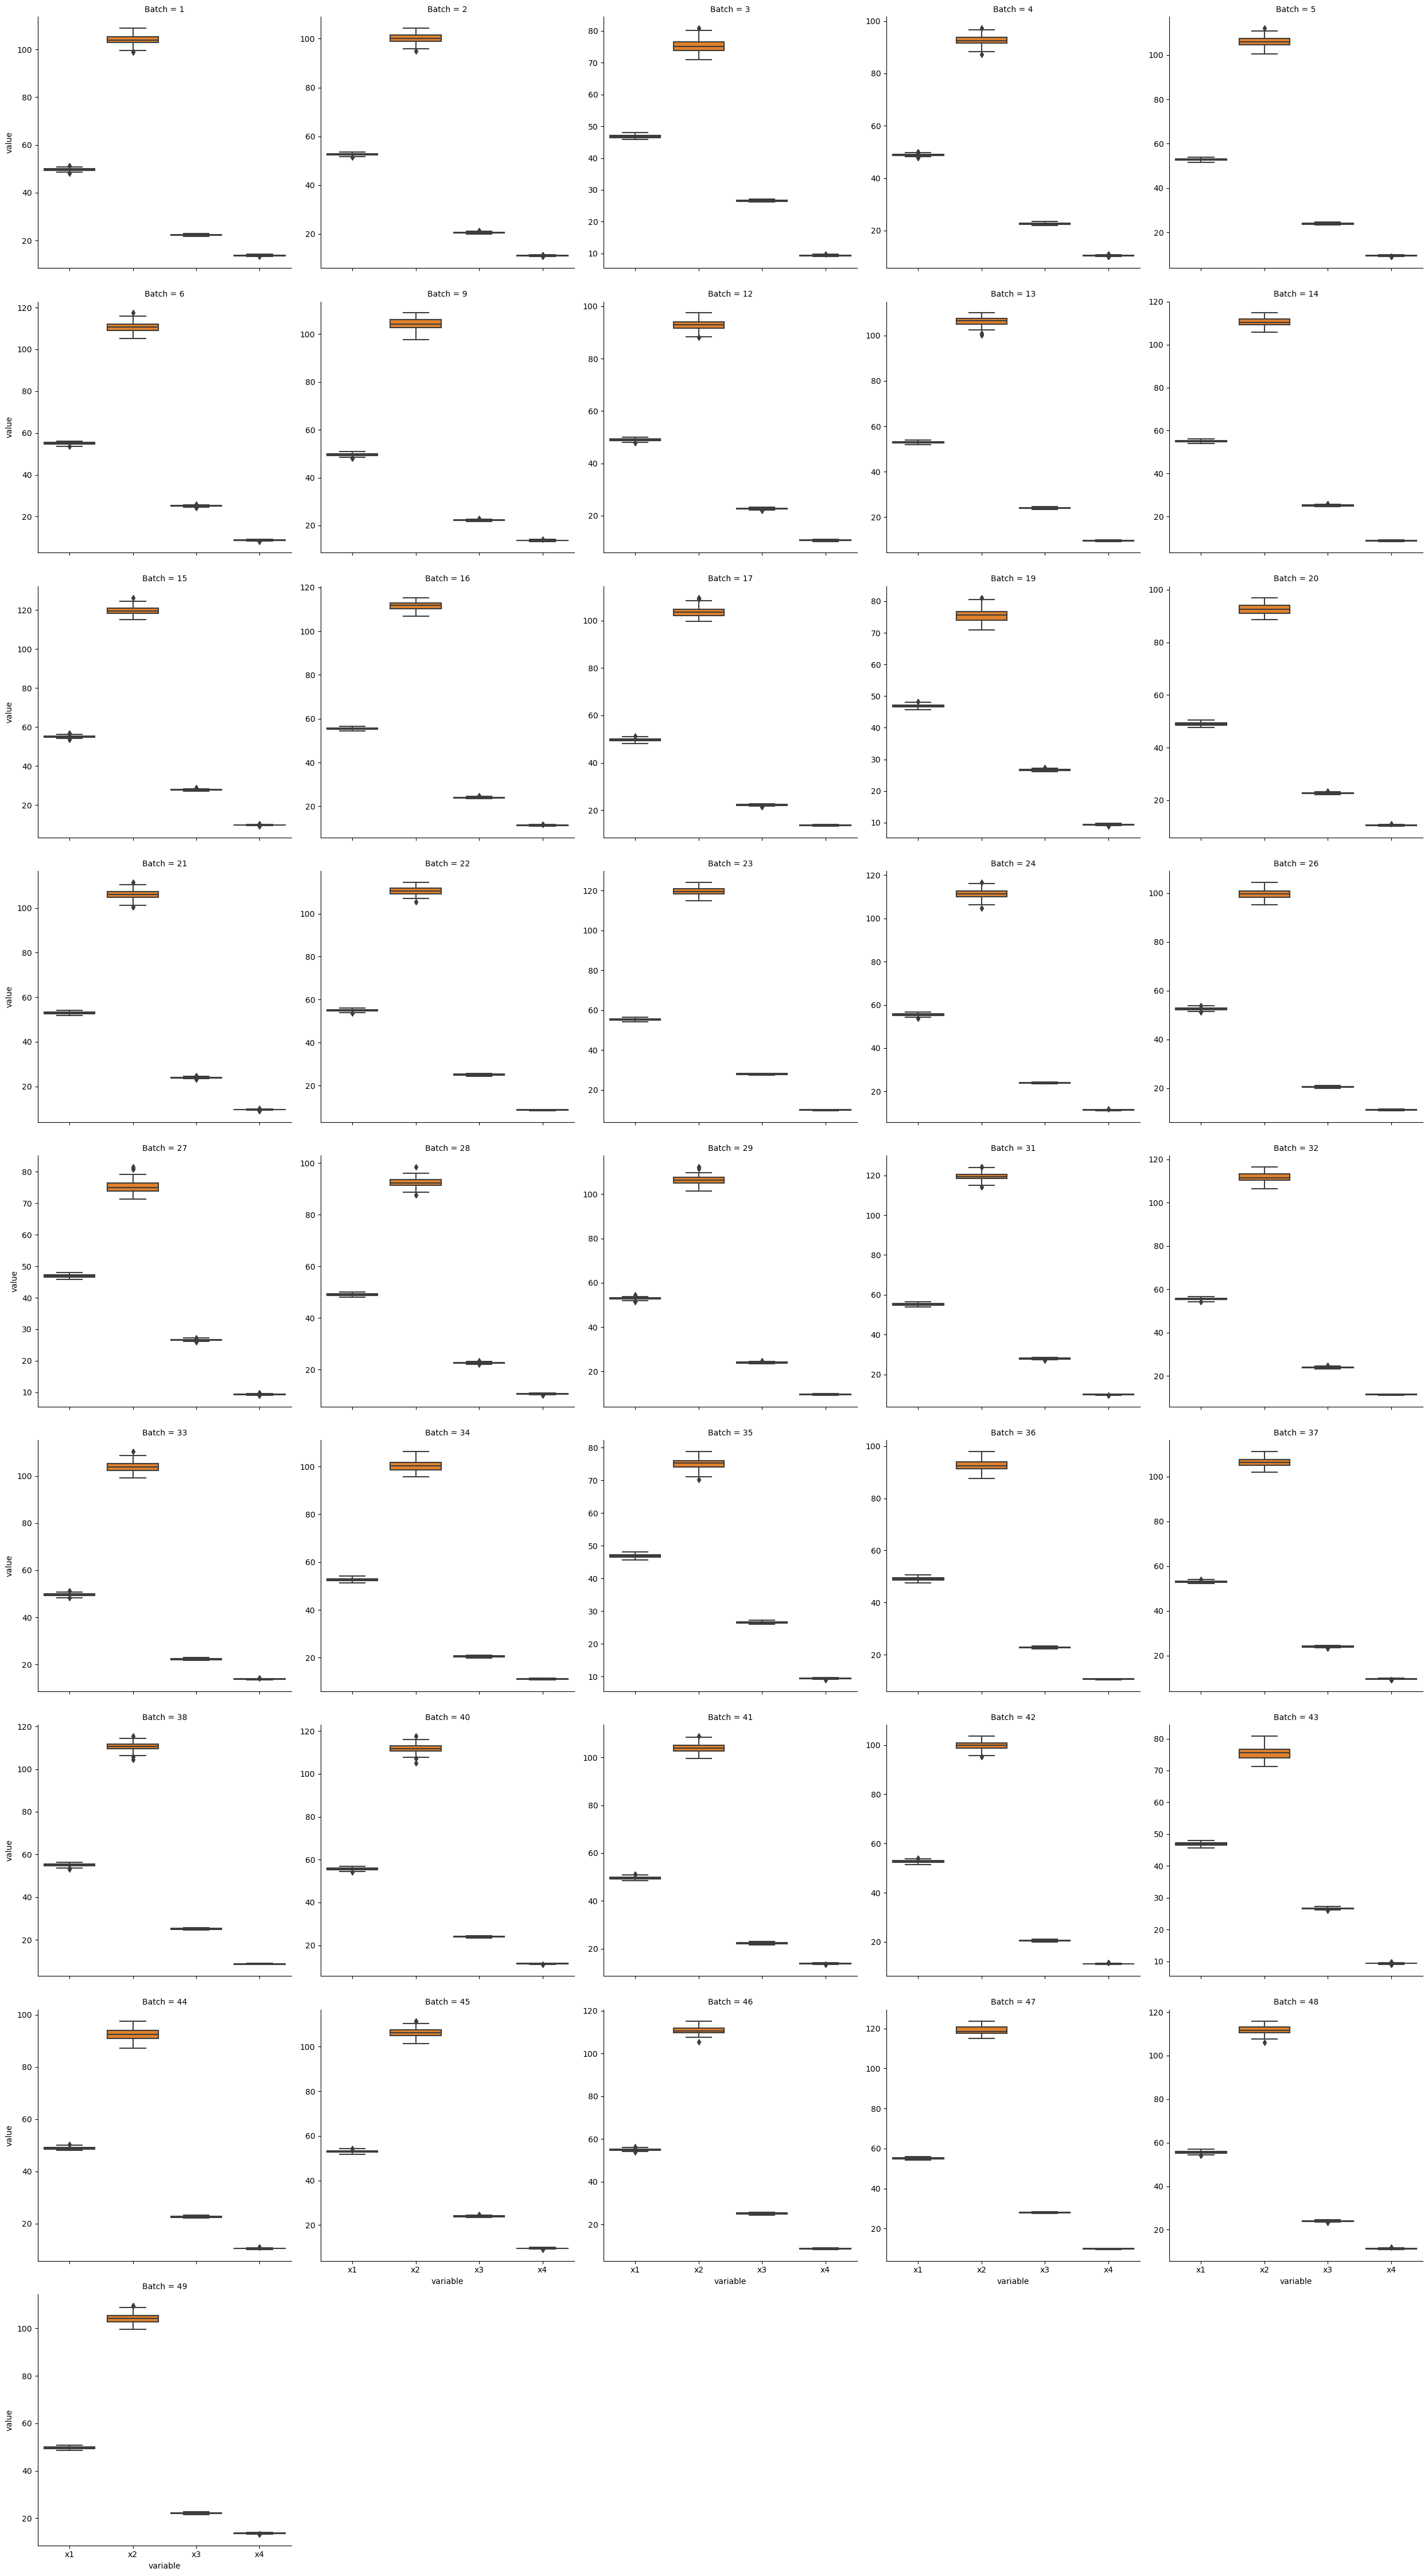

In [100]:
sns.catplot(data=m03_lf, x='variable',y='value', col='Batch', kind='box', col_wrap=5,sharey=False)

plt.show()

The summary statistics of the OPERATING VARIABLES x1 through x4 vary among among each other but the boxplots are similar across the Batch values in machine 3.

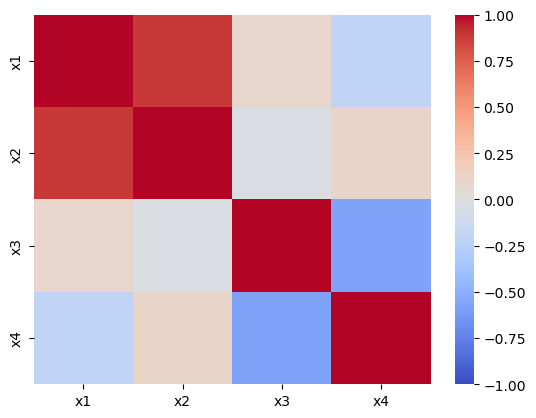

In [101]:
fig, ax=plt.subplots()

sns.heatmap(data=m03_df.corr(numeric_only=True), vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)

plt.show()

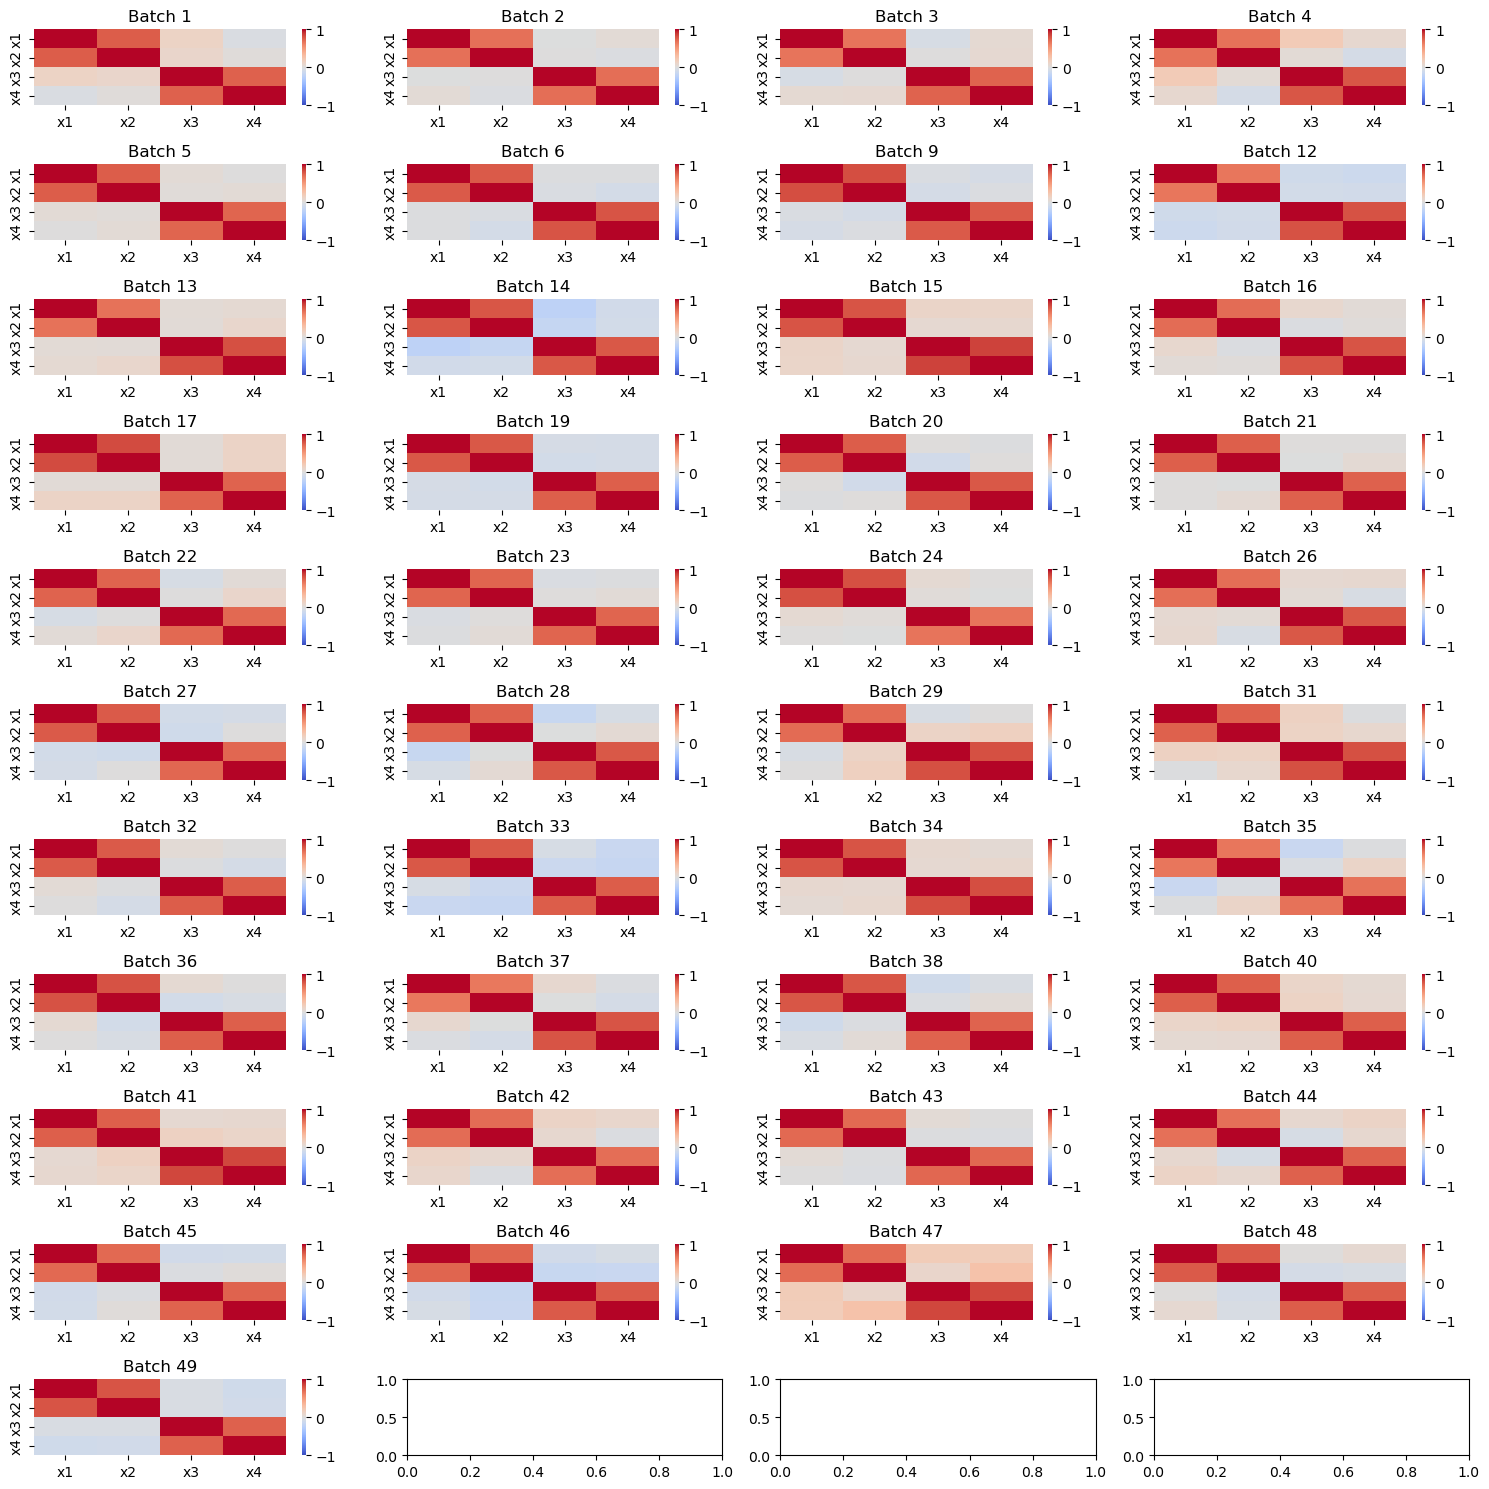

In [361]:
# Get unique values of 'Batch'
batch_values = m03_df['Batch'].unique()

# Define the number of rows and columns for subplots
num_rows = 11
num_cols = 4

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Calculate and plot correlation heatmaps for each 'Batch' group
for i, batch in enumerate(batch_values):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    subset_df = m03_df[m03_df['Batch'] == batch]
    corr_matrix = subset_df.corr(numeric_only=True)
    
    sns.heatmap(data=corr_matrix, vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)
    ax.set_title(f'Batch {batch}')
    #ax.axis('off')  # Turn off axis labels and ticks

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

What we can see that we have strong correlation between (x1,x2) and (x3,x4), they are strongly correlated accross batches as well. 

### Super Machines

In [103]:
m01_df_new=m01_df.copy()
m02_df_new=m02_df.copy()
m03_df_new=m03_df.copy()

In [104]:
m01_df_new['machine_id']=1
m02_df_new['machine_id']=2
m03_df_new['machine_id']=3

In [105]:
# concatenate the 3 DataFrames into a single DataFrame which includes the `machine_id` variable

machine_df = pd.concat( [m01_df_new, m02_df_new, m03_df_new], ignore_index=True)

In [107]:
machine_df.tail()

ID  Batch  s_id         x1          x2         x3  \
14724  B049-M03-S100     49   100  49.278415  102.089925  22.396979   
14725  B049-M03-S101     49   101  49.264754  104.619874  21.977716   
14726  B049-M03-S102     49   102  49.465358  102.867473  22.257845   
14727  B049-M03-S103     49   103  49.751785  104.863427  22.461204   
14728  B049-M03-S104     49   104  49.819212  104.075176  22.462165   

              x4  machine_id  
14724  13.753264           3  
14725  13.636539           3  
14726  13.678206           3  
14727  13.880084           3  
14728  13.853014           3

In [112]:
machine_df['Batch']=machine_df.Batch.astype('category')
machine_df['s_id']=machine_df.s_id.astype('category')
machine_df['ID']=machine_df.ID.astype('category')
machine_df['machine_id']=machine_df.machine_id.astype('category')


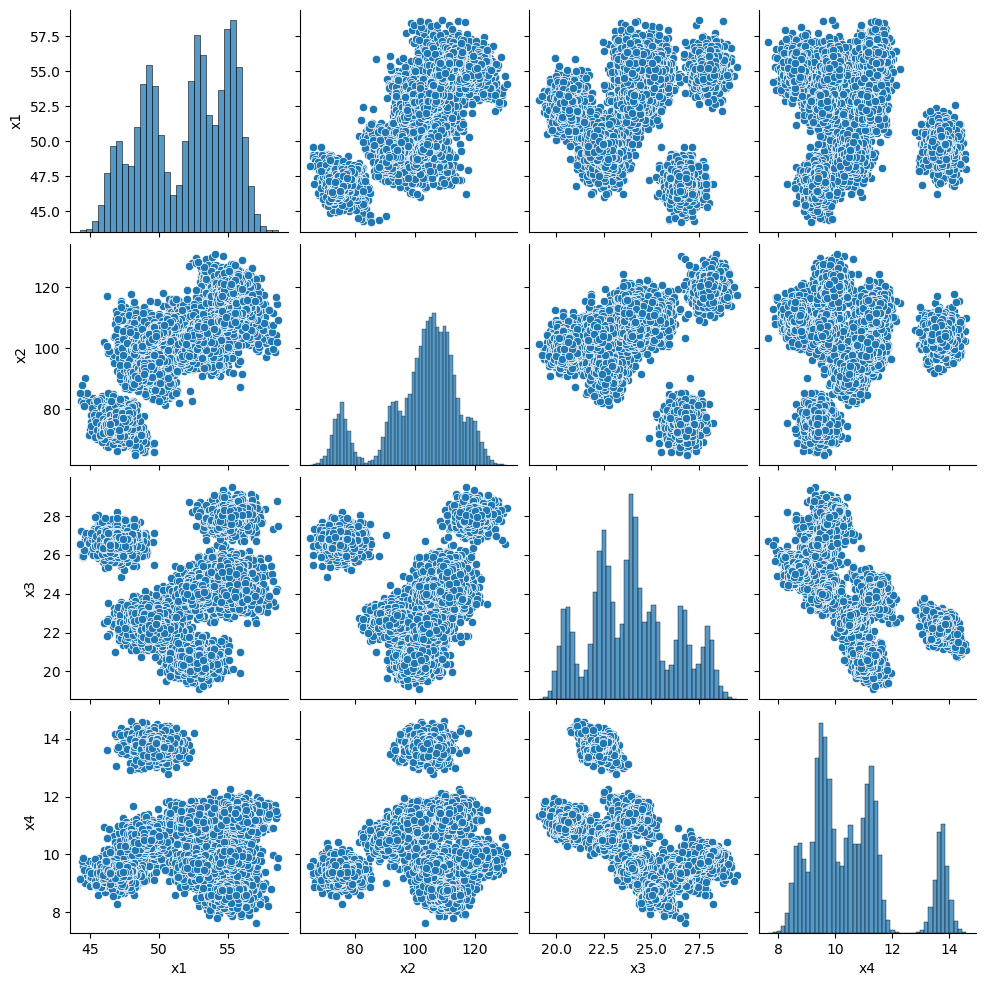

In [284]:
sns.pairplot(data=machine_df, diag_kws={'common_bins': False, 'common_norm': False})

plt.show()

In [143]:
machine_df_uniquebatch=  pd.DataFrame(machine_df.groupby('machine_id')['Batch'].nunique())
machine_df_uniquebatch.reset_index(inplace=True)

In [145]:
machine_df_uniquebatch.columns=['machine_id', 'unique_batch']

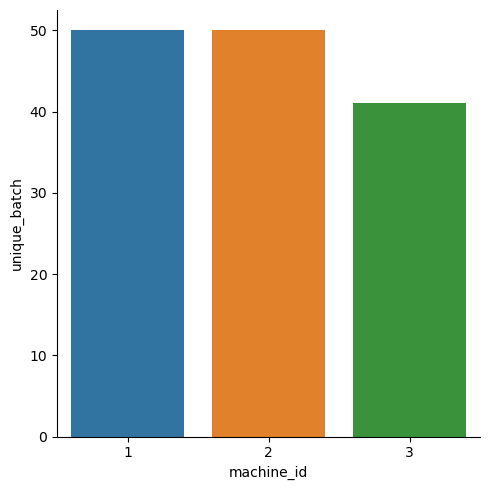

In [147]:
sns.catplot(data=machine_df_uniquebatch, x='machine_id', y='unique_batch', kind='bar')

plt.show()

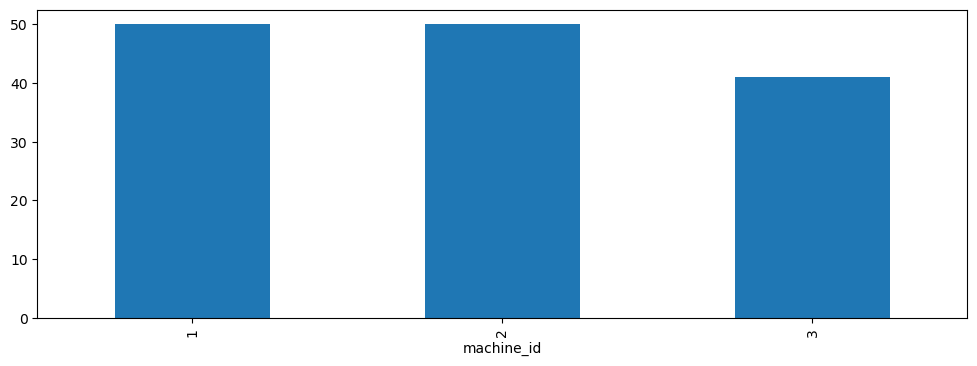

In [270]:
fig, ax = plt.subplots(figsize=(12, 4))

machine_df.groupby('machine_id')['Batch'].nunique().plot( kind='bar', ax=ax )

plt.show()

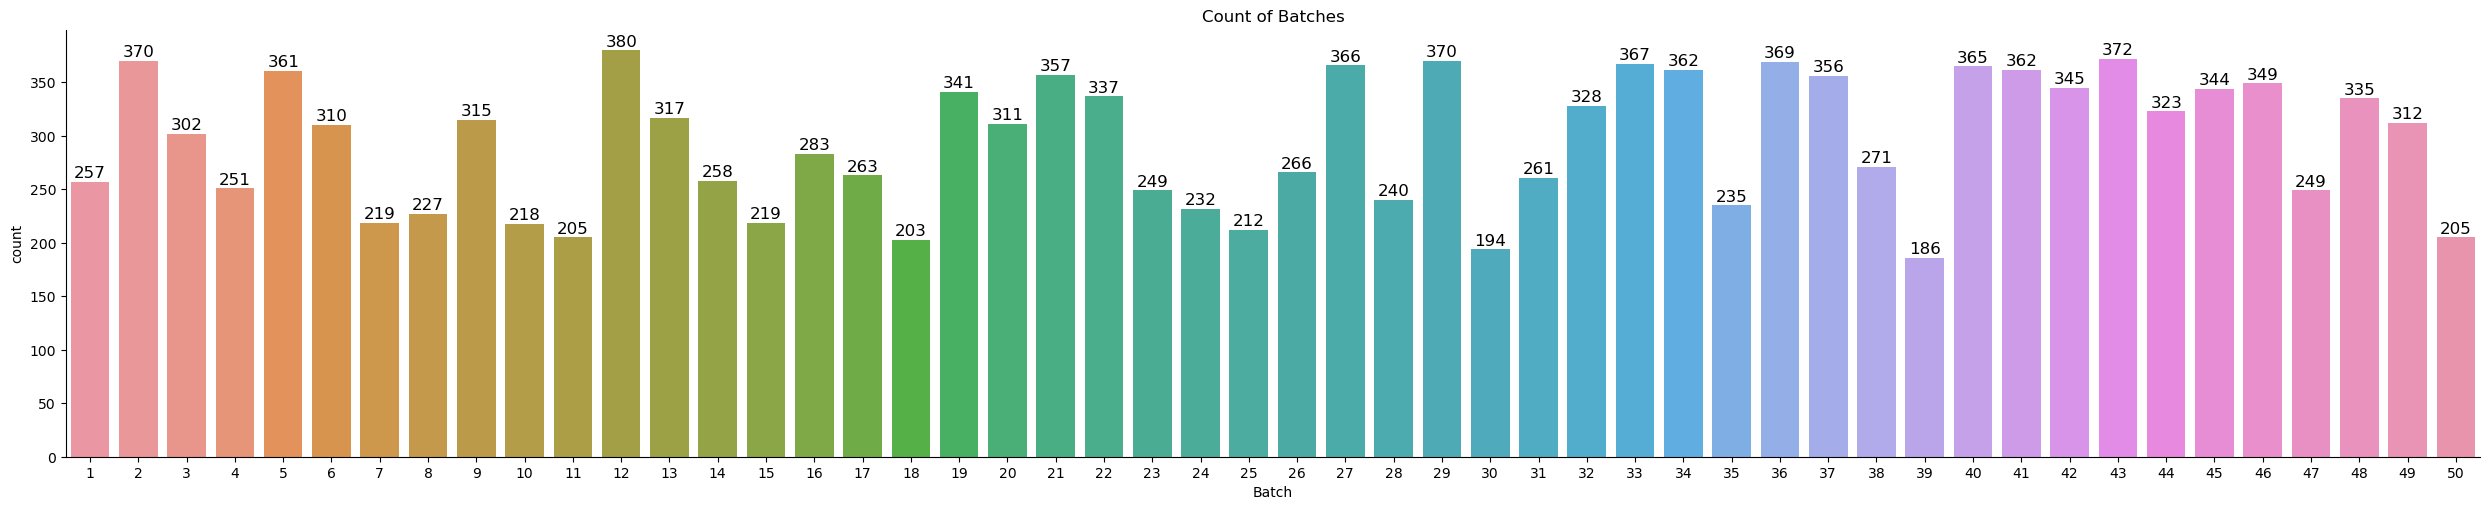

In [114]:
ax= sns.catplot(data=machine_df, x='Batch', kind='count', aspect=5)

counts = machine_df['Batch'].value_counts().sort_index()
for i, count in enumerate(counts):
    ax.ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

# Set plot title
plt.title('Count of Batches')

plt.show()

In [148]:
machine_df_cat_col = machine_df.select_dtypes('category').copy().columns.to_list()

In [149]:
machine_df_features_col = machine_df.select_dtypes('number').columns.copy()


In [150]:
machine_lf = machine_df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=machine_df_cat_col+['rowid'], value_vars=machine_df_features_col)


In [151]:
machine_lf.head()

ID Batch s_id machine_id  rowid variable      value
0  B001-M01-S001     1    1          1      0       x1  50.117118
1  B001-M01-S002     1    2          1      1       x1  46.887333
2  B001-M01-S003     1    3          1      2       x1  50.132744
3  B001-M01-S004     1    4          1      3       x1  48.501042
4  B001-M01-S005     1    5          1      4       x1  49.690442

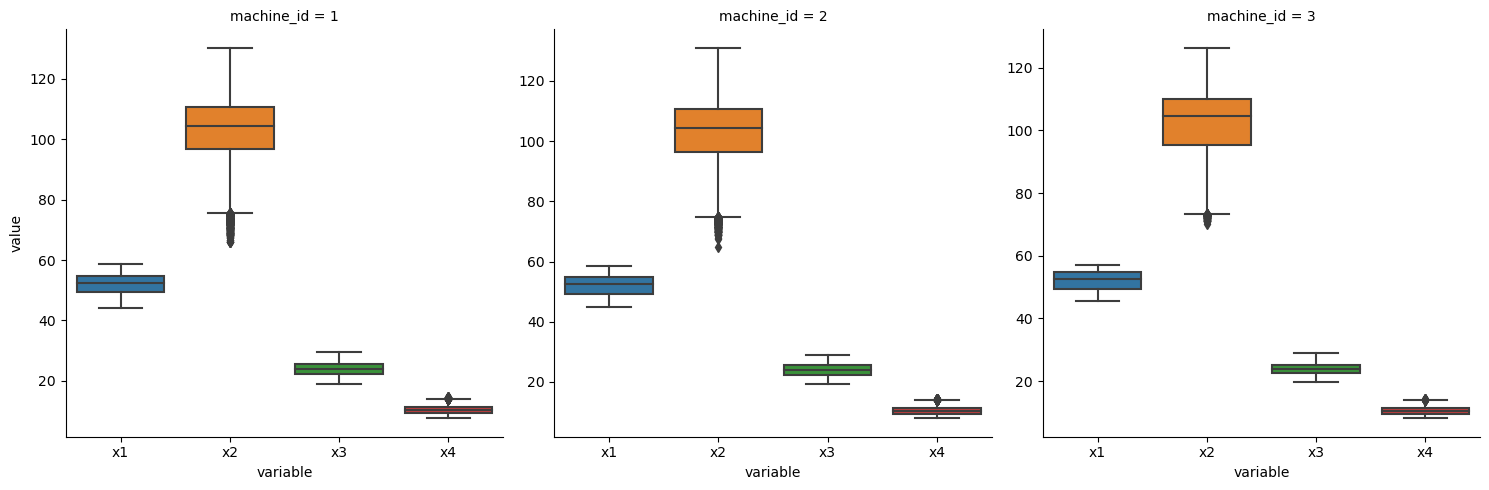

In [152]:
sns.catplot(data=machine_lf, x='variable',y='value', col='machine_id', kind='box',sharey=False)

plt.show()

The summary statistics of the OPERATING VARIABLES x1 through x4 vary among among each other but the boxplots are similar across the machines.

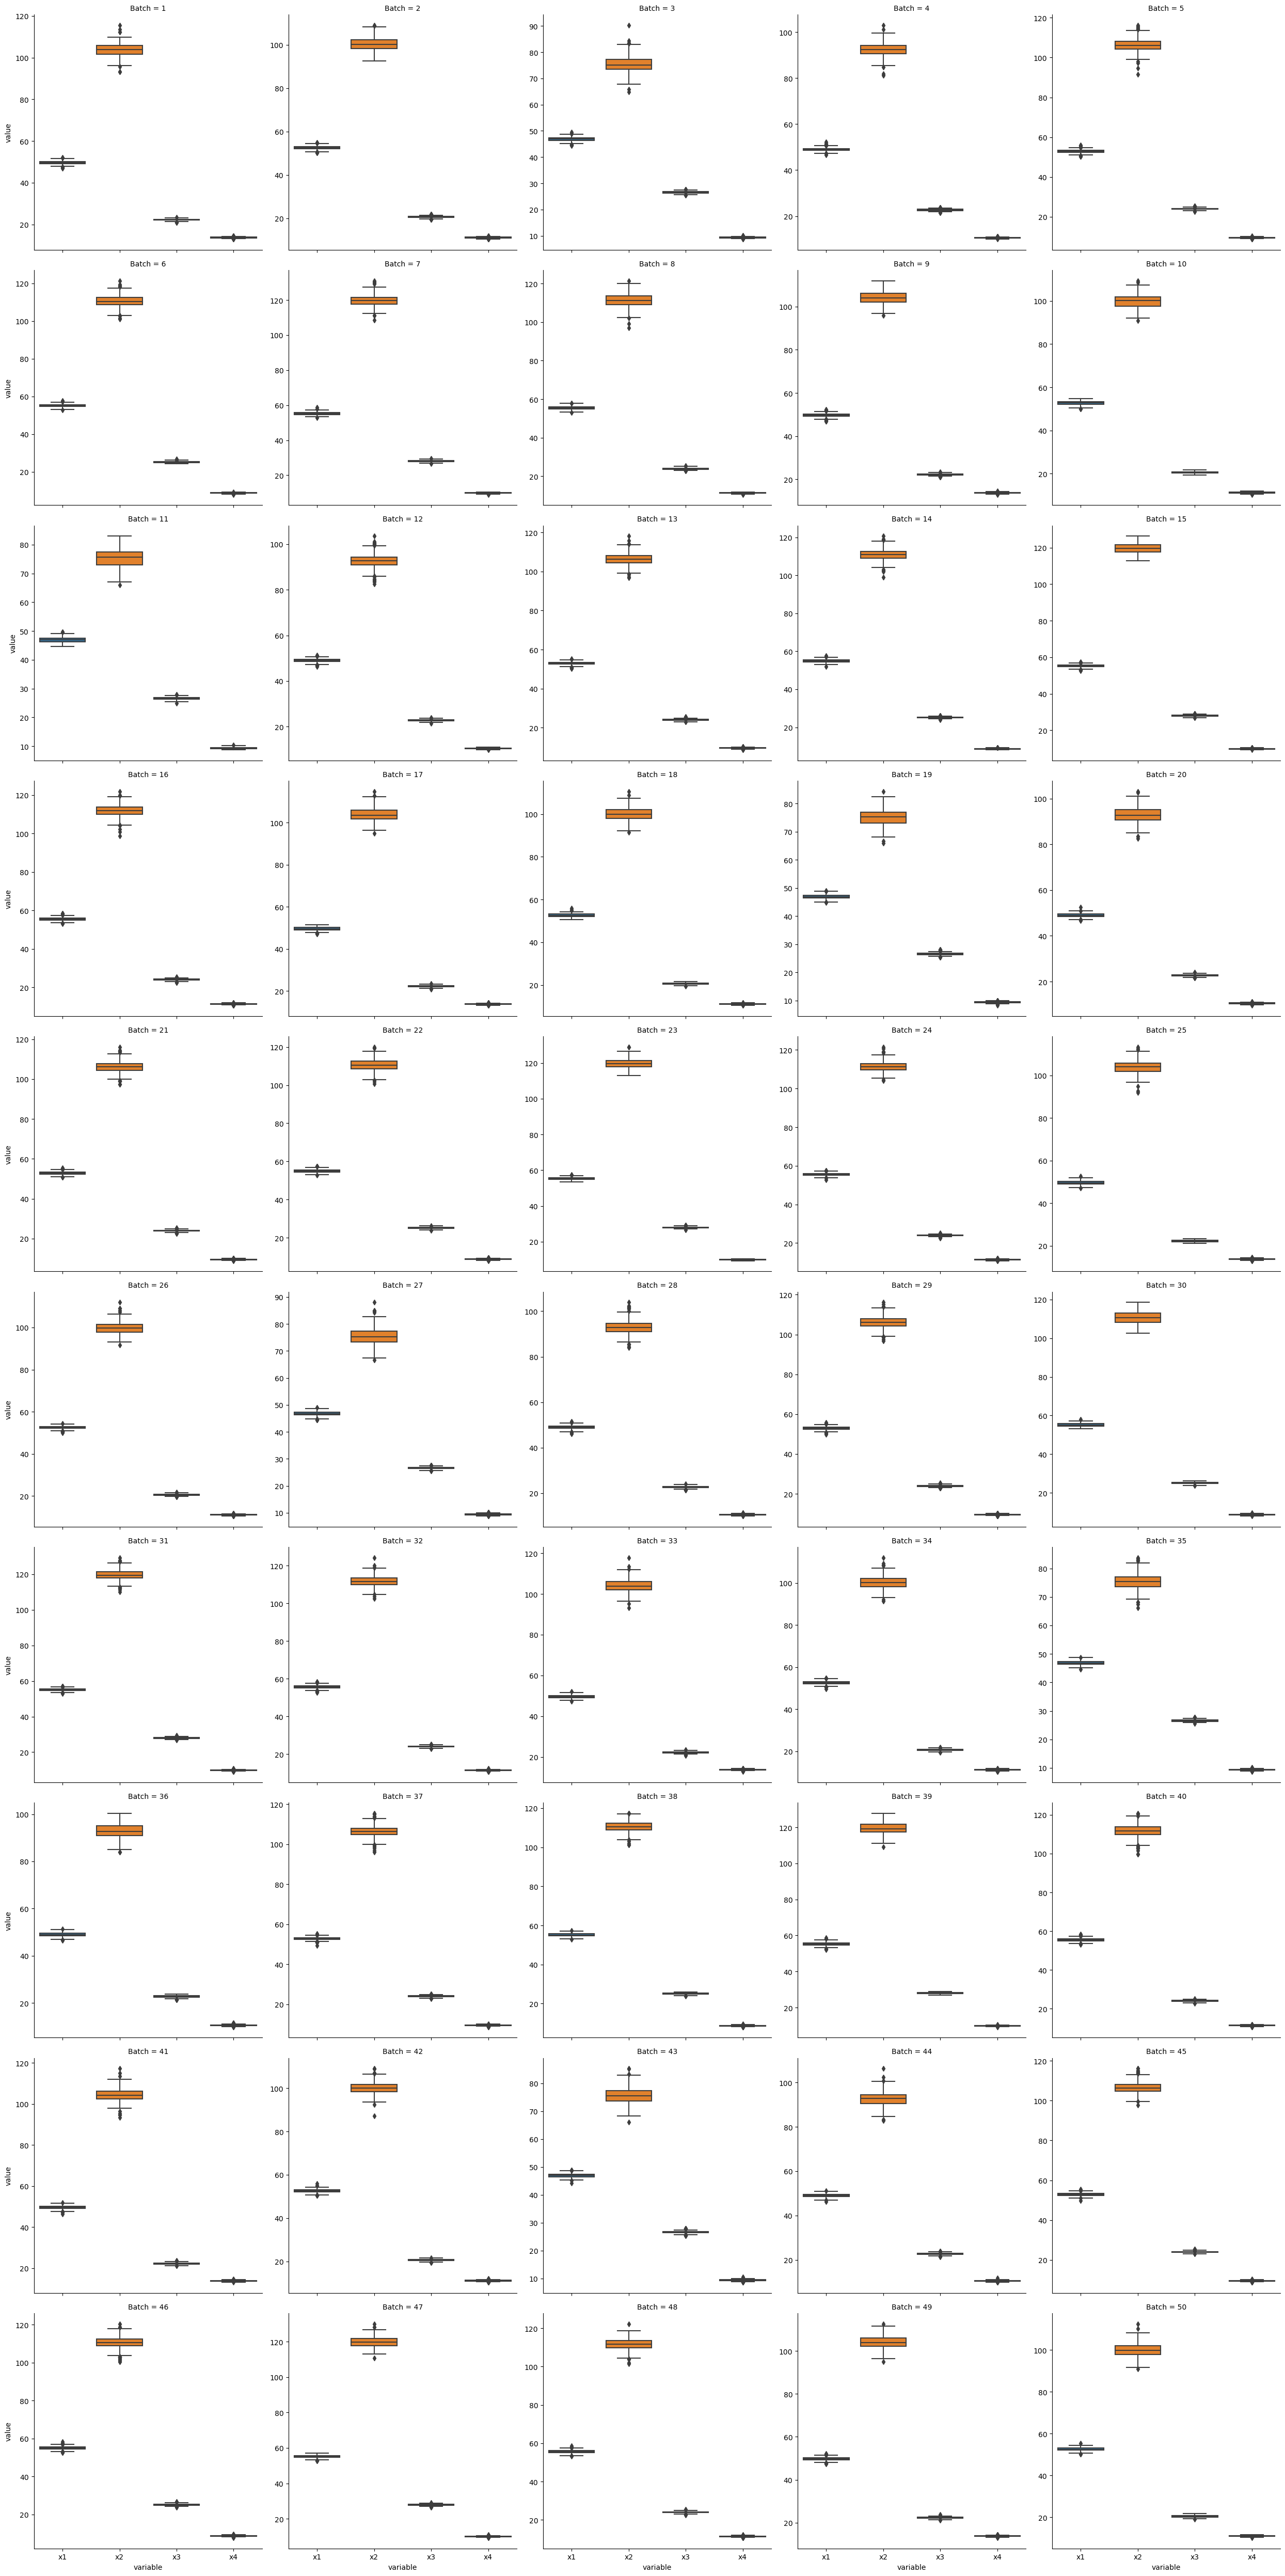

In [153]:
sns.catplot(data=machine_lf, x='variable',y='value', col='Batch', kind='box', col_wrap=5,sharey=False)

plt.show()

The summary statistics of the OPERATING VARIABLES x1 through x4 vary among among each other but the boxplots are more or les similar across the Batches.

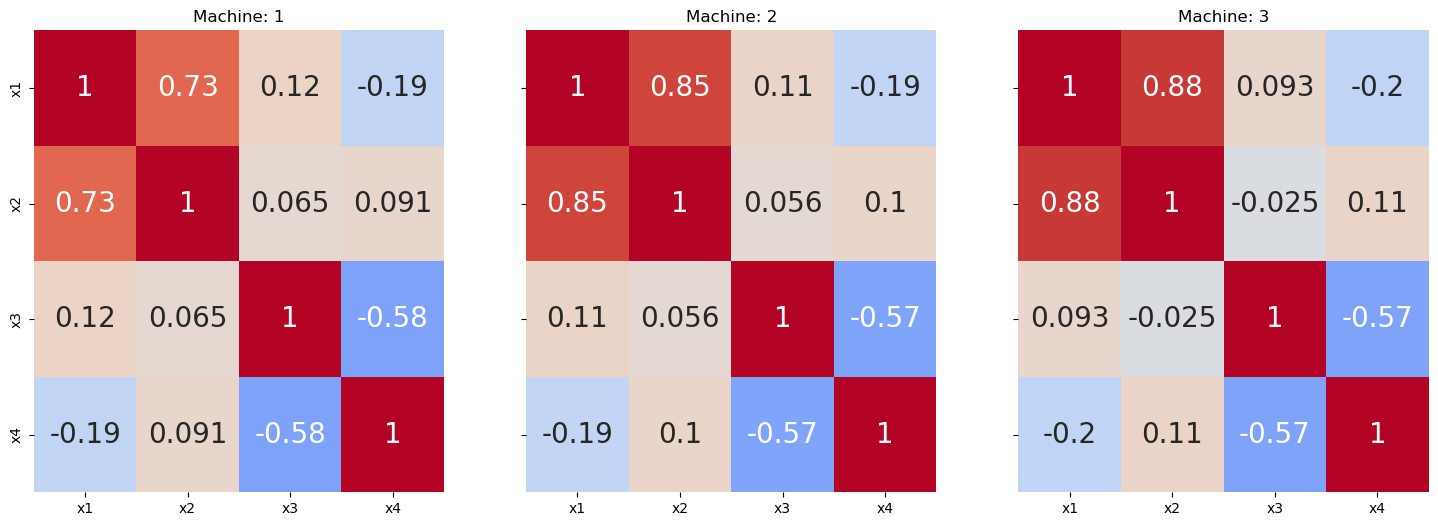

In [174]:
the_groups = machine_df.machine_id.unique().tolist()
corr_per_group = machine_df.loc[ :, ['x1', 'x2', 'x3', 'x4', 'machine_id']].groupby(['machine_id']).corr()


fig, axs = plt.subplots(1, len(the_groups), figsize=(18, 6), sharex=True, sharey=True )

for ix in range(len(the_groups)):
    sns.heatmap( data = corr_per_group.loc[ the_groups[ ix ] ],
                 vmin=-1, vmax=1, center = 0,
                 cmap='coolwarm', cbar=False,
                 annot=True, annot_kws={'size': 20},
                 ax=axs[ix] )
    
    axs[ ix ].set_title('Machine: %s' % the_groups[ ix ] )

plt.show()

The relationships between the OPERATING VARIABLES x1 through x4 don't vary much across the three MACHINES.

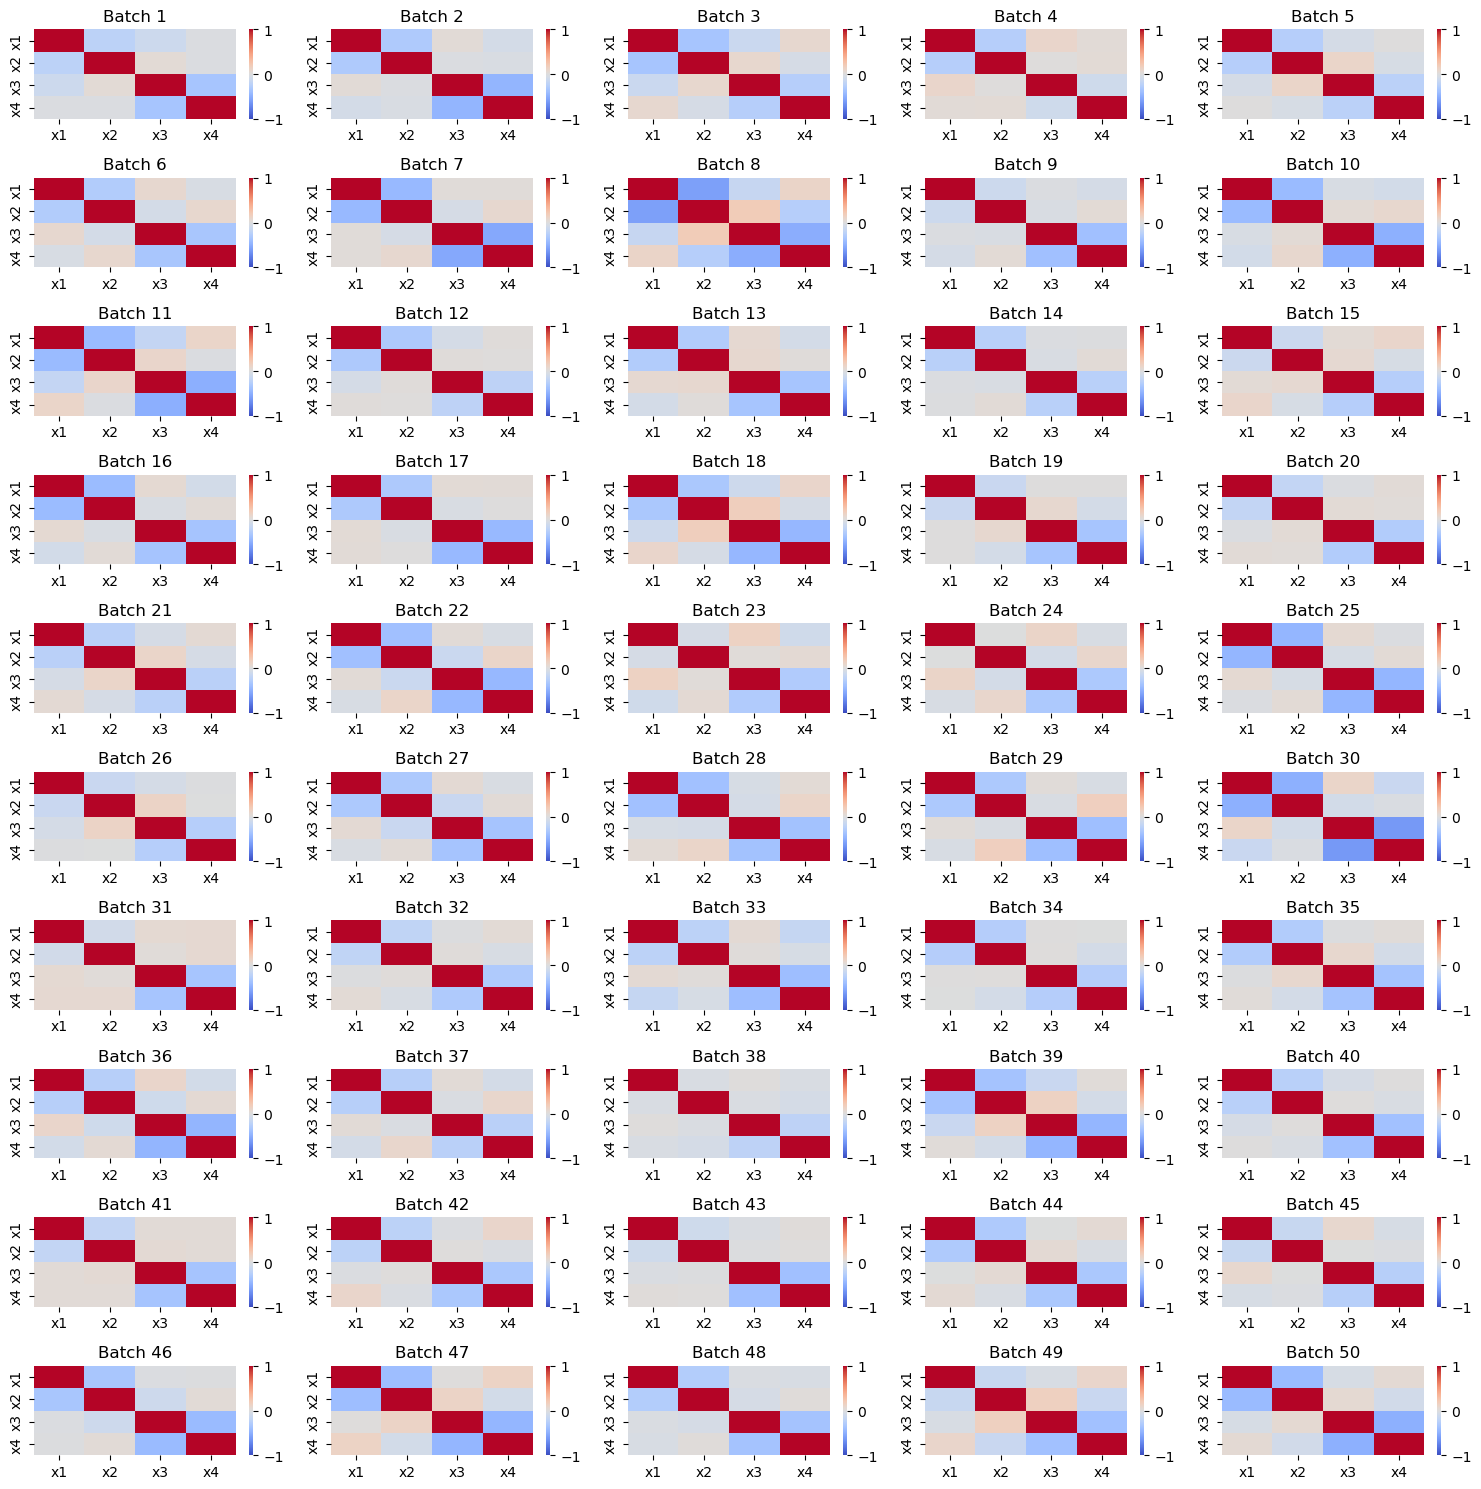

In [155]:
# Get unique values of 'Batch'
batch_values = machine_df['Batch'].unique()

# Define the number of rows and columns for subplots
num_rows = 10
num_cols = 5

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Calculate and plot correlation heatmaps for each 'Batch' group
for i, batch in enumerate(batch_values):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    subset_df = machine_df[machine_df['Batch'] == batch]
    corr_matrix = subset_df.corr(numeric_only=True)
    
    sns.heatmap(data=corr_matrix, vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)
    ax.set_title(f'Batch {batch}')
    #ax.axis('off')  # Turn off axis labels and ticks

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

They vary a little accross batch values.

## Problem 02

The supplier batch data set file name is provided for you below. You must read in the CSV file and assign the data set to the `batch_df` object. 

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in the data? 
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:
* Do the summary statistics for `Density` depend on the `Supplier`?
* Does the average `Density` depend on the `Supplier`?
* How does `Density` relate to `Batch` for each `Supplier`?

After exploring the `batch_df` DataFrame, you **MUST** JOIN/MERGE the `batch_df` DataFrame with the `machine_df` DataFrame. Assign the merged DataFrame to the `dfa` DataFrame.

You can now explore the relationships between the MACHINE OPERATIONAL VARIABLES and the SUPPLIERS! You must use visualizations to explore the following relationships:
* Explore if the summary statistics of the 4 OPERATING VARIABLES `x1` through `x4` vary across `Batch` for each MACHINE given each `Supplier`. Your figures MUST use `Batch` as the x-axis variable.
* Explore if the relationships between the 4 OPERATING VARIABLES `x1` through `x4` vary across `Supplier`.

You may add as many markdown and code cells as you see fit to answer this question.

#### SOLUTION

In [156]:
# define the batch supplier file
batch_file = 'midterm_supplier.csv'

In [157]:
# read in the batch supplier data set

batch_df = pd.read_csv(batch_file)

In [158]:
batch_df.shape

(50, 3)

In [159]:
batch_df.dtypes

Batch         int64
Supplier     object
Density     float64
dtype: object

In [160]:
batch_df.nunique()

Batch       50
Supplier     2
Density     50
dtype: int64

In [161]:
batch_df.isna().sum()

Batch       0
Supplier    0
Density     0
dtype: int64

In [162]:
batch_df.head()

Batch Supplier    Density
0      1        B  10.388587
1      2        A   9.296880
2      3        A   9.565636
3      4        B  10.005387
4      5        A   9.339177

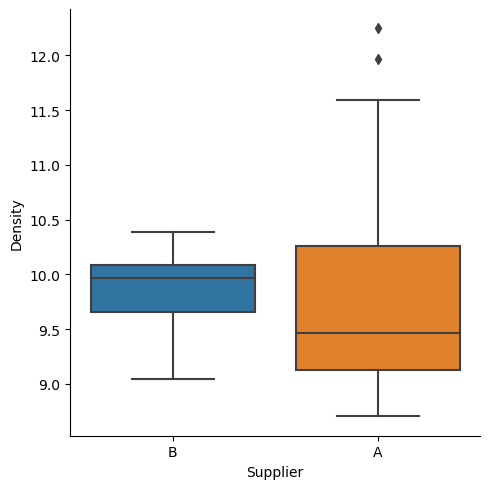

In [163]:
sns.catplot(data=batch_df, x= 'Supplier', y='Density', kind='box')

plt.show()

Yes, the summary statistics for Density depend on the Supplier.

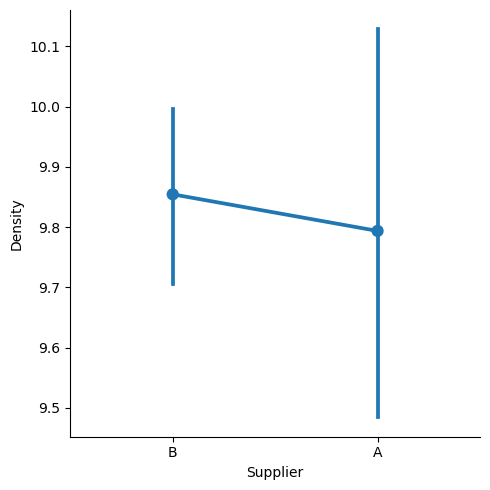

In [165]:
sns.catplot(data=batch_df, x= 'Supplier', y='Density', kind='point')

plt.show()

Yes, the avg Density depend on the Supplier.

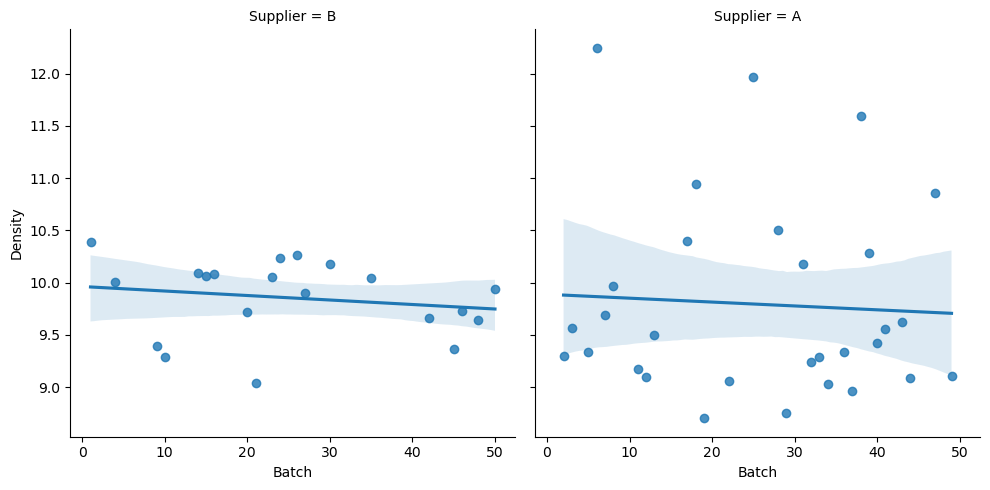

In [170]:
sns.lmplot(data=batch_df, x='Batch', y='Density', col='Supplier')

plt.show()

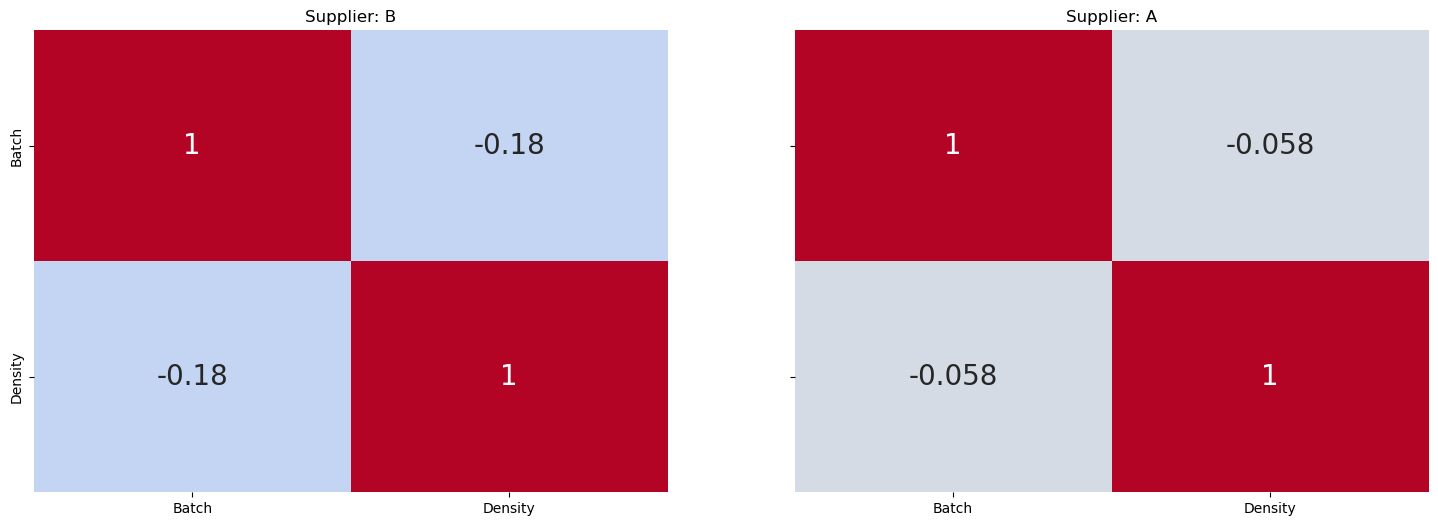

In [173]:
the_groups = batch_df.Supplier.unique().tolist()
corr_per_group = batch_df.loc[ :, ['Batch', 'Density', 'Supplier']].groupby(['Supplier']).corr()


fig, axs = plt.subplots(1, len(the_groups), figsize=(18, 6), sharex=True, sharey=True )

for ix in range(len(the_groups)):
    sns.heatmap( data = corr_per_group.loc[ the_groups[ ix ] ],
                 vmin=-1, vmax=1, center = 0,
                 cmap='coolwarm', cbar=False,
                 annot=True, annot_kws={'size': 20},
                 ax=axs[ix] )
    
    axs[ ix ].set_title('Supplier: %s' % the_groups[ ix ] )

plt.show()

For supplier B, we have strong negative correlation and for supplier A, we have weak negative correlation. 

In [175]:
# merge the batch supplier data set with the (concatenated) machine data set

dfa = pd.merge( machine_df, batch_df, on='Batch', how='outer')

In [176]:
dfa.head()

ID  Batch s_id         x1          x2         x3         x4  \
0  B001-M01-S001      1    1  50.117118  102.167346  22.067812  13.889524   
1  B001-M01-S002      1    2  46.887333  112.266102  23.197330  13.064709   
2  B001-M01-S003      1    3  50.132744  103.674908  22.319933  13.647482   
3  B001-M01-S004      1    4  48.501042  107.143156  22.162947  14.077758   
4  B001-M01-S005      1    5  49.690442  102.120283  22.248696  13.728666   

  machine_id Supplier    Density  
0          1        B  10.388587  
1          1        B  10.388587  
2          1        B  10.388587  
3          1        B  10.388587  
4          1        B  10.388587

In [177]:
dfa.shape

(14729, 10)

In [178]:
dfa.dtypes

ID            category
Batch            int64
s_id          category
x1             float64
x2             float64
x3             float64
x4             float64
machine_id    category
Supplier        object
Density        float64
dtype: object

In [179]:
dfa.isna().sum()

ID            0
Batch         0
s_id          0
x1            0
x2            0
x3            0
x4            0
machine_id    0
Supplier      0
Density       0
dtype: int64

In [183]:
dfa['Batch']=dfa.Batch.astype('category')
dfa['Supplier']=dfa.Supplier.astype('category')
dfa_cat_col= dfa.select_dtypes('category').columns.to_list()
dfa_num_col=dfa.select_dtypes('number').columns.to_list()

In [198]:
lfa = dfa.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=dfa_cat_col+['rowid','Density'], value_vars=dfa_num_col)


In [199]:
lfa.head()

ID Batch s_id machine_id Supplier  rowid    Density variable  \
0  B001-M01-S001     1    1          1        B      0  10.388587       x1   
1  B001-M01-S002     1    2          1        B      1  10.388587       x1   
2  B001-M01-S003     1    3          1        B      2  10.388587       x1   
3  B001-M01-S004     1    4          1        B      3  10.388587       x1   
4  B001-M01-S005     1    5          1        B      4  10.388587       x1   

       value  
0  50.117118  
1  46.887333  
2  50.132744  
3  48.501042  
4  49.690442

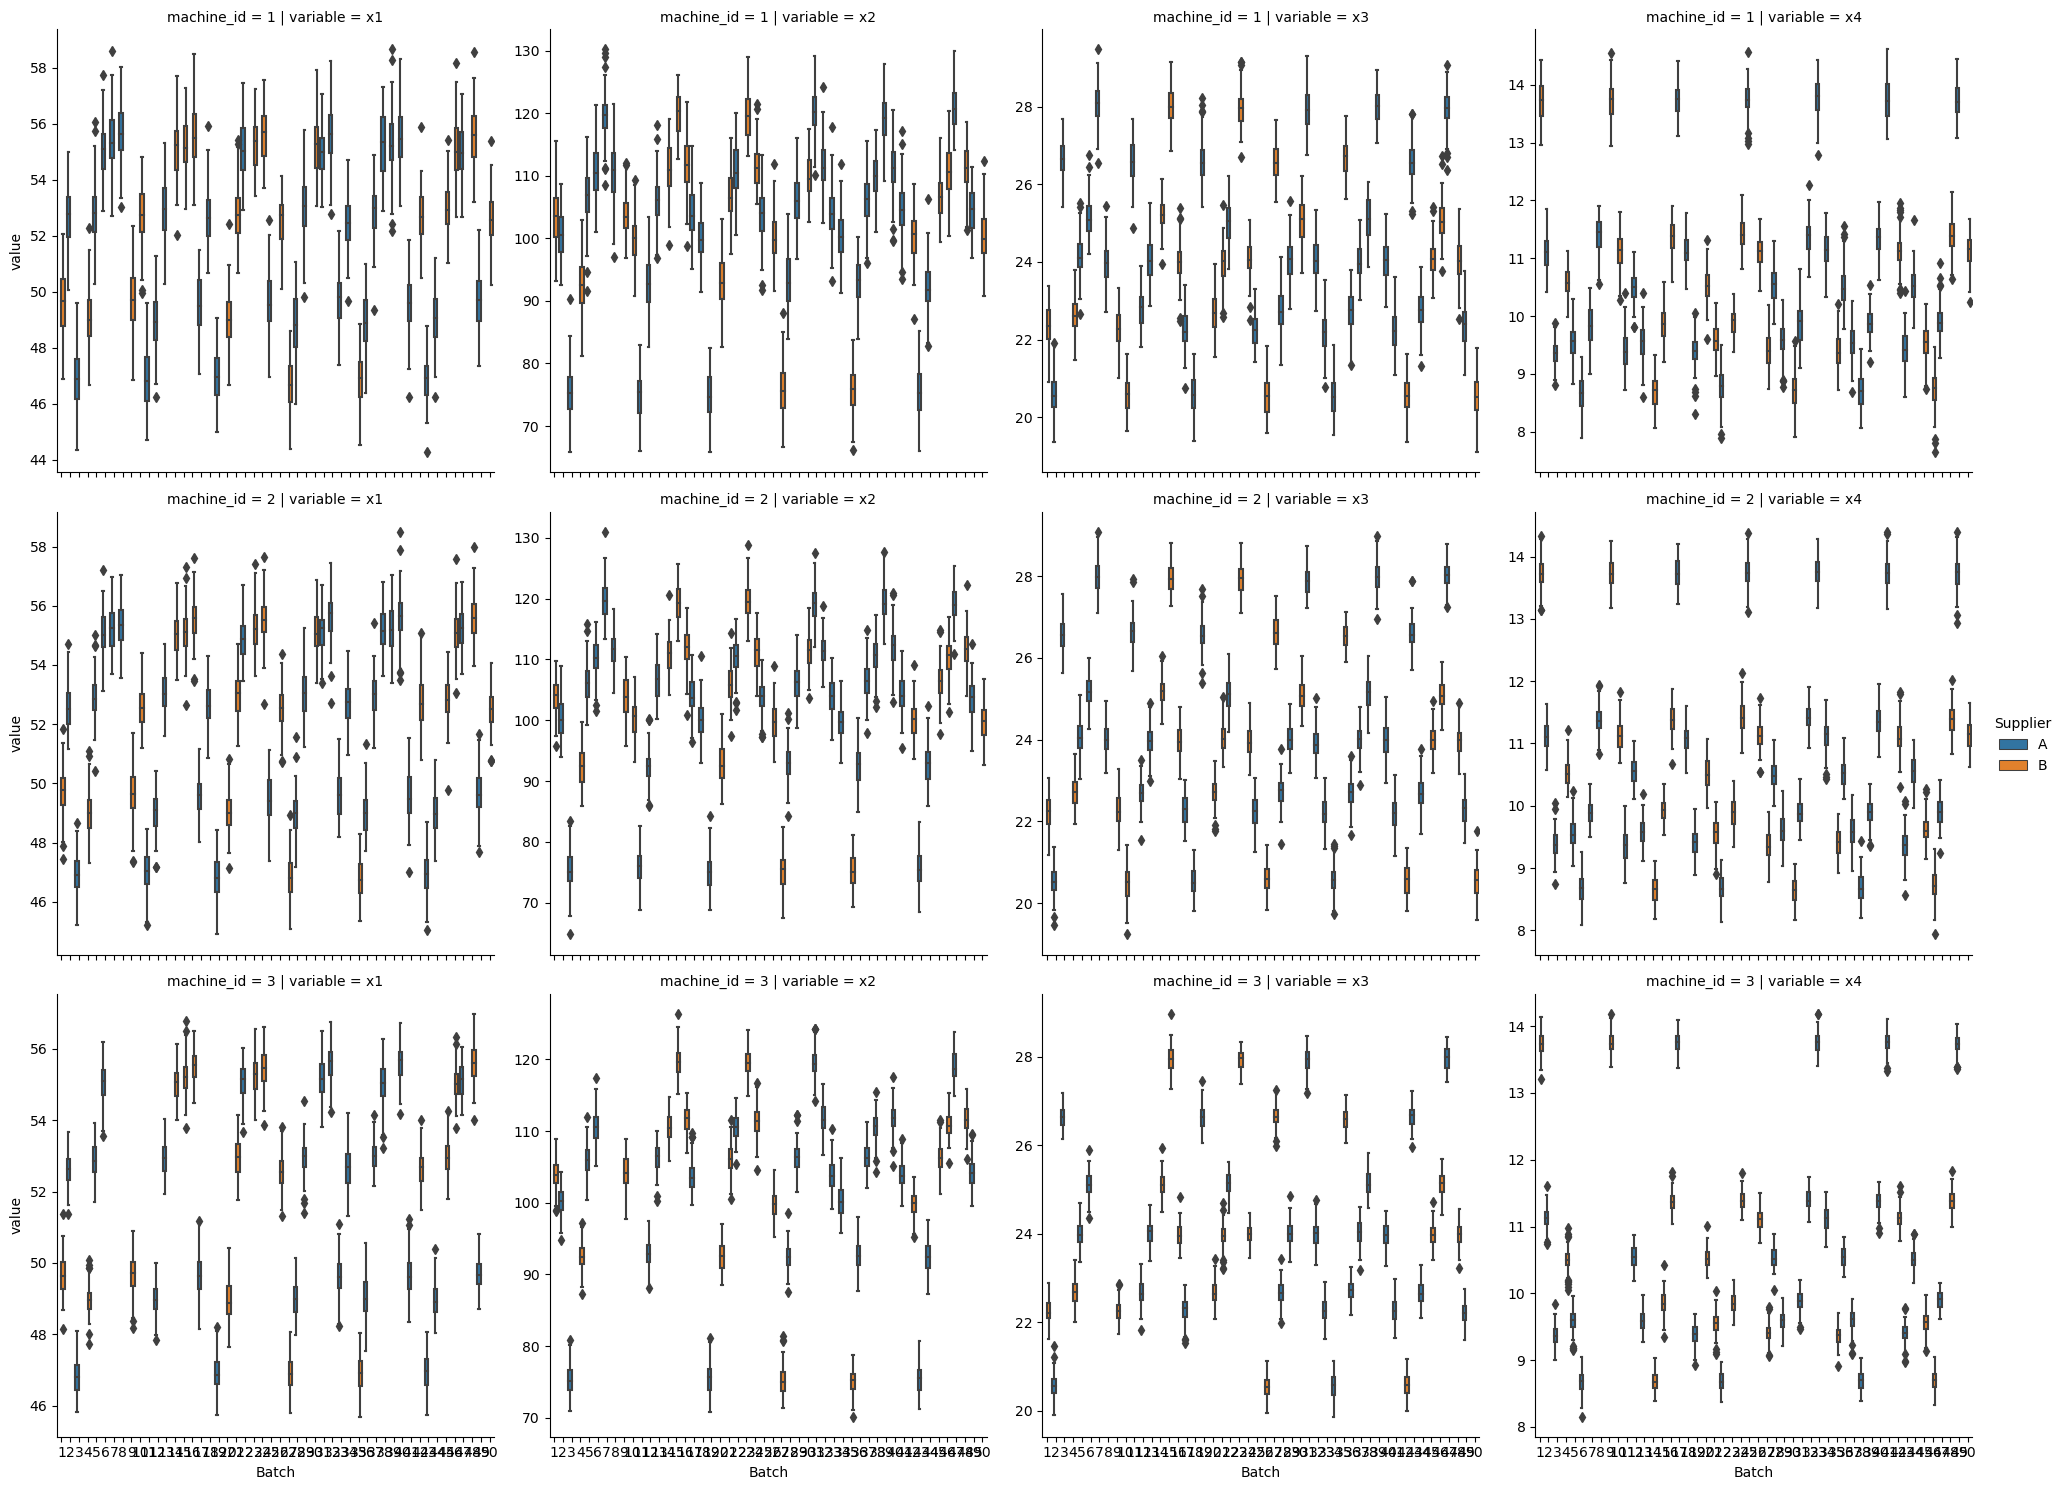

In [202]:
sns.catplot(data=lfa, x='Batch', y='value', row='machine_id', col='variable', hue='Supplier', kind='box', sharey=False)

plt.show()

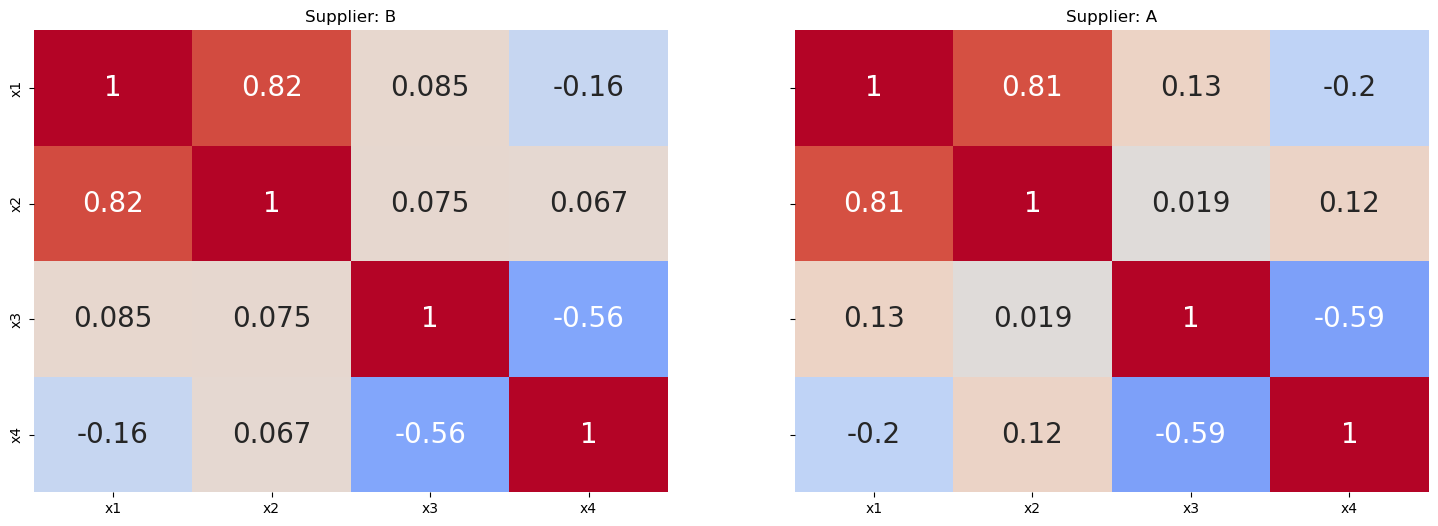

In [188]:
the_groups = dfa.Supplier.unique().tolist()
corr_per_group = dfa.loc[ :, ['x1', 'x2', 'x3', 'x4', 'Supplier']].groupby(['Supplier']).corr()


fig, axs = plt.subplots(1, len(the_groups), figsize=(18, 6), sharex=True, sharey=True )

for ix in range(len(the_groups)):
    sns.heatmap( data = corr_per_group.loc[ the_groups[ ix ] ],
                 vmin=-1, vmax=1, center = 0,
                 cmap='coolwarm', cbar=False,
                 annot=True, annot_kws={'size': 20},
                 ax=axs[ix] )
    
    axs[ ix ].set_title('Supplier: %s' % the_groups[ ix ] )

plt.show()

They don't vary much accross suppliers.

## Problem 03

The DROP TEST result data set file name is provided for you below. You must read in the CSV file and assign the dta set to the `test_df` object. 

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in the data? 
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:
* Count the number of times each unique value of `Result` occurs for each `test_group_id` value.

After exploring the `test_df` DataFrame, you **MUST** JOIN/MERGE the `test_df` DataFrame with the `dfa` DataFrame. Assign the merged DataFrame to the `dfb` DataFrame. You **MUST** answer the following:
* How many rows remain using the DEFAULT joining procedure?

You may add as many markdown and code cells as you see fit to answer this question. 

#### SOLUTION

In [203]:
# define the test data set file name
test_file = 'midterm_test.csv'

In [204]:
# read in the test data set

test_df = pd.read_csv(test_file)

In [205]:
test_df.shape

(1412, 3)

In [206]:
test_df.dtypes

ID               object
test_group_id    object
Result            int64
dtype: object

In [207]:
test_df.nunique()

ID               1412
test_group_id     141
Result              2
dtype: int64

In [208]:
test_df.isna().sum()

ID               0
test_group_id    0
Result           0
dtype: int64

In [209]:
test_df.head()

ID test_group_id  Result
0  B001-M01-S056           A-0       1
1  B001-M01-S002           A-0       1
2  B001-M01-S049           A-0       1
3  B001-M01-S030           A-0       0
4  B001-M01-S048           A-0       1

In [210]:
test_df['Result']=test_df.Result.astype('category')

In [251]:
test_df.groupby(['test_group_id','Result']).size().reset_index()

test_group_id Result   0
0             A-0      0   1
1             A-0      1   6
2             A-1      0   8
3             A-1      1   4
4             A-2      0   5
..            ...    ...  ..
277           Z-2      1   0
278           Z-3      0  10
279           Z-3      1   0
280           Z-4      0  11
281           Z-4      1   1

[282 rows x 3 columns]

In [267]:
test_df.groupby(['test_group_id','Result']).\
    aggregate(value_count= ('test_group_id','size')).reset_index()

test_group_id Result  value_count
0             A-0      0            1
1             A-0      1            6
2             A-1      0            8
3             A-1      1            4
4             A-2      0            5
..            ...    ...          ...
277           Z-2      1            0
278           Z-3      0           10
279           Z-3      1            0
280           Z-4      0           11
281           Z-4      1            1

[282 rows x 3 columns]

In [272]:
cross_table= pd.crosstab(test_df.test_group_id, test_df.Result)

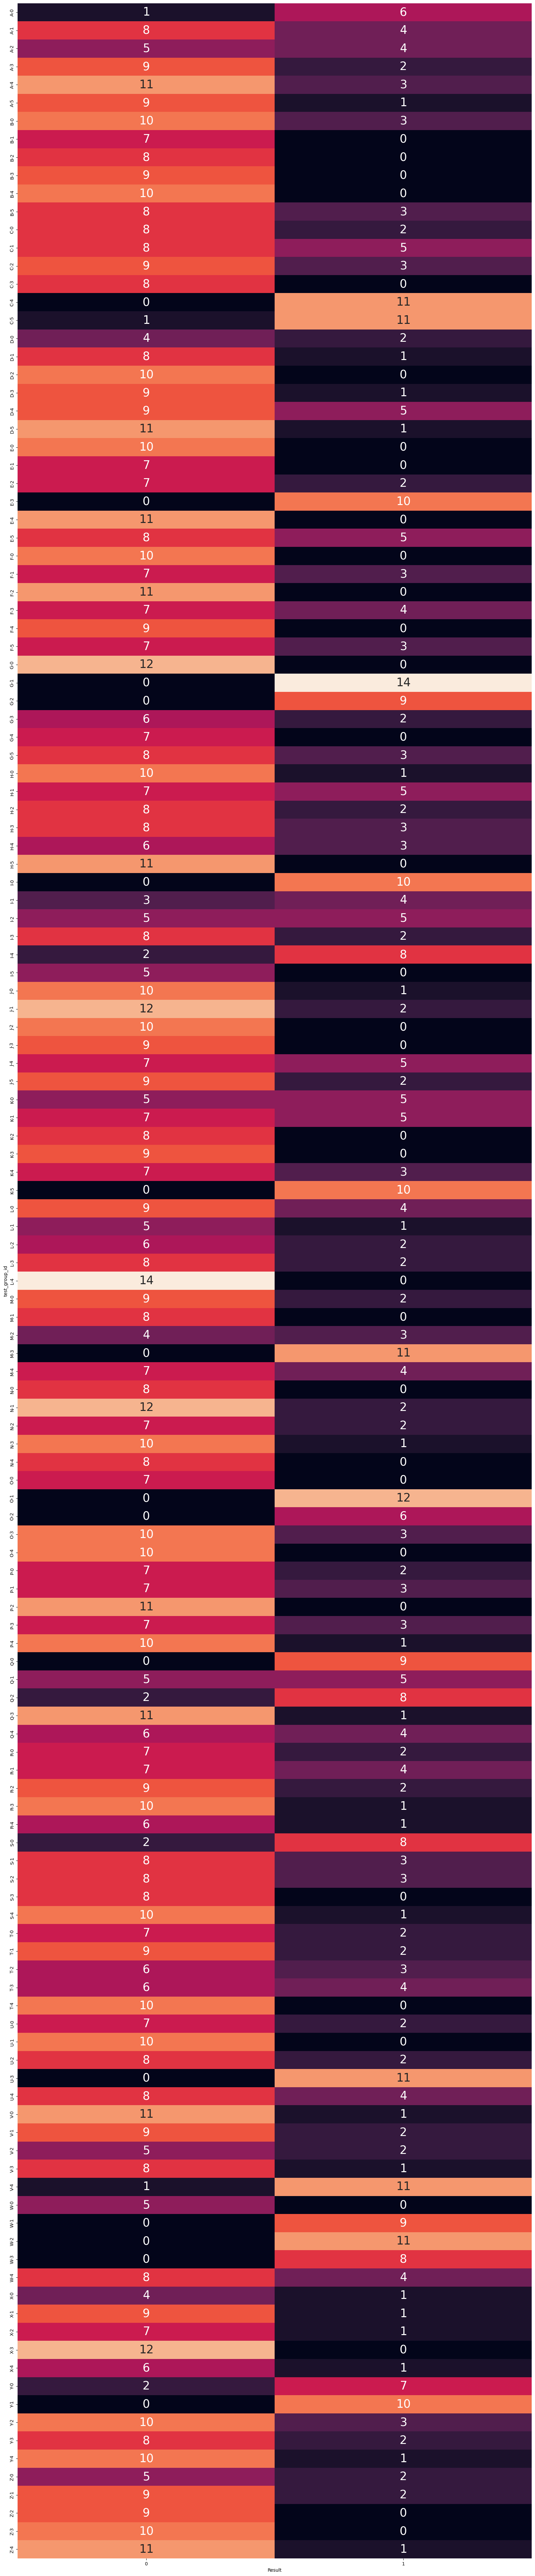

In [283]:
fig, axs = plt.subplots(figsize=(20,100))

sns.heatmap(cross_table, ax=axs, annot=True, cbar=False,
            annot_kws={'size': 25})

plt.show()

In [369]:
dfb=pd.merge(dfa, test_df, on='ID')

In [370]:
dfb.shape

(1412, 12)

The default join has 1412 rows.

In [371]:
dfb.head()

ID Batch s_id         x1          x2         x3         x4  \
0  B001-M01-S002     1    2  46.887333  112.266102  23.197330  13.064709   
1  B001-M01-S024     1   24  51.531574  100.207219  22.281345  13.796810   
2  B001-M01-S030     1   30  48.306819  109.445722  22.910858  13.839830   
3  B001-M01-S038     1   38  52.058573   93.272568  21.937216  13.332882   
4  B001-M01-S048     1   48  50.564504  109.184587  22.083064  13.954942   

  machine_id Supplier    Density test_group_id Result  
0          1        B  10.388587           A-0      1  
1          1        B  10.388587           A-0      1  
2          1        B  10.388587           A-0      0  
3          1        B  10.388587           A-0      1  
4          1        B  10.388587           A-0      1

We have 14729 rows.

## Problem 04

You must now examine the merged `dfb` object and answer the following:

* Count the number of times each unique value of `Result` occurs for each value of `machine_id`.
* Count the number of times each unique value of `Result` occurs for each value of `Supplier`.
* Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id`.
* Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id` and `Supplier`.
* Calculate the PROPORTION of times the cell phone case failed the test in each `Batch` per `machine_id`.
* Visualize the PROPORTION of times the cell phone case failed the test in each `Batch` per `machine_id` and for each unique value of `Supplier`.

*HINT*: Remember that a FAILED test is encoded as `Result == 1`. How can you calculate the PROPORTION of times `Result == 1`?

Add as many cells as you see fit to answer this question.

#### SOLUTION

In [372]:
dfb.shape

(1412, 12)

In [373]:
dfb.dtypes

ID                 object
Batch            category
s_id             category
x1                float64
x2                float64
x3                float64
x4                float64
machine_id       category
Supplier         category
Density           float64
test_group_id      object
Result           category
dtype: object

In [374]:
dfb.nunique()

ID               1412
Batch              50
s_id              134
x1               1412
x2               1412
x3               1412
x4               1412
machine_id          3
Supplier            2
Density            50
test_group_id     141
Result              2
dtype: int64

In [375]:
dfb.isna().sum()

ID               0
Batch            0
s_id             0
x1               0
x2               0
x3               0
x4               0
machine_id       0
Supplier         0
Density          0
test_group_id    0
Result           0
dtype: int64

In [376]:
dfb.groupby('machine_id')['Result'].value_counts()

machine_id  Result
1           0         333
            1         159
2           0         342
            1         147
3           0         311
            1         120
Name: Result, dtype: int64

In [377]:
dfb.groupby(['Supplier','Result'], dropna=False).size().reset_index()

Supplier Result    0
0        A      0  588
1        A      1  290
2        B      0  398
3        B      1  136

In [378]:
dfb.groupby(['Supplier', 'Result'], dropna=False).\
aggregate(num_rows = ('survived', 'size')

SyntaxError: unexpected EOF while parsing (75797434.py, line 2)

In [379]:
result_matrix = dfb.pivot_table(index='Batch', columns=['machine_id', 'Result'], aggfunc='size', fill_value=0)
result_matrix

machine_id   1       2       3    
Result       0   1   0   1   0   1
Batch                             
1            1   6   0  10   0   8
2           10   3   9   2  12   0
3            8   2   5   4   8   2
4            4   2   8   0  10   0
5           10   0   9   3  11   3
6           10   0  10   0  10   0
7           12   0   7   2   0   0
8           10   1  11   0   0   0
9            0  10   0   9   0  11
10          10   1   8   2   0   0
11           5   5   5   5   0   0
12           9   4  10   0   9   5
13           9   2   8   0  11   0
14           8   0   6   2   9   0
15           7   0   4   3   7   0
16           7   2   7   2   6   3
17           0   9   0   6   2   8
18           7   2  11   0   0   0
19           2   8   2   8   7   5
20           7   2   9   2   7   3
21           7   2   8   3  14   0
22          11   1   6   3   7   4
23           5   0   8   2   8   0
24           4   1   5   2  10   0
25           2   7   0  11   0   0
26           5   2   7   1  10   1
27           8   4  10   3   6   4
28           7   0   9   0   6   1
29           8   5   9   2  10   1
30           8   1   9   0   0   0
31           7   0   8   0  10   0
32           7   3   9   1   8   4
33           0  14   0  10   1  11
34           7   5   7   4   8   4
35           3   4   6   2   6   1
36          12   2   8   3  10   1
37           7   5   8   2  11   1
38           5   1   9   0   9   1
39           8   0   9   0   0   0
40          12   2   8   2   8   3
41           0  12   0  11   1  11
42           7   3  10   1  11   1
43           5   5  10   3   8   5
44           7   4   7   3   7   3
45           8   3  11   1   8   3
46           9   2  10   1  11   0
47          10   0   8   0   5   0
48           9   2   6   4   9   2
49           0   9   0  11   0  10
50           9   1   8   1   0   0

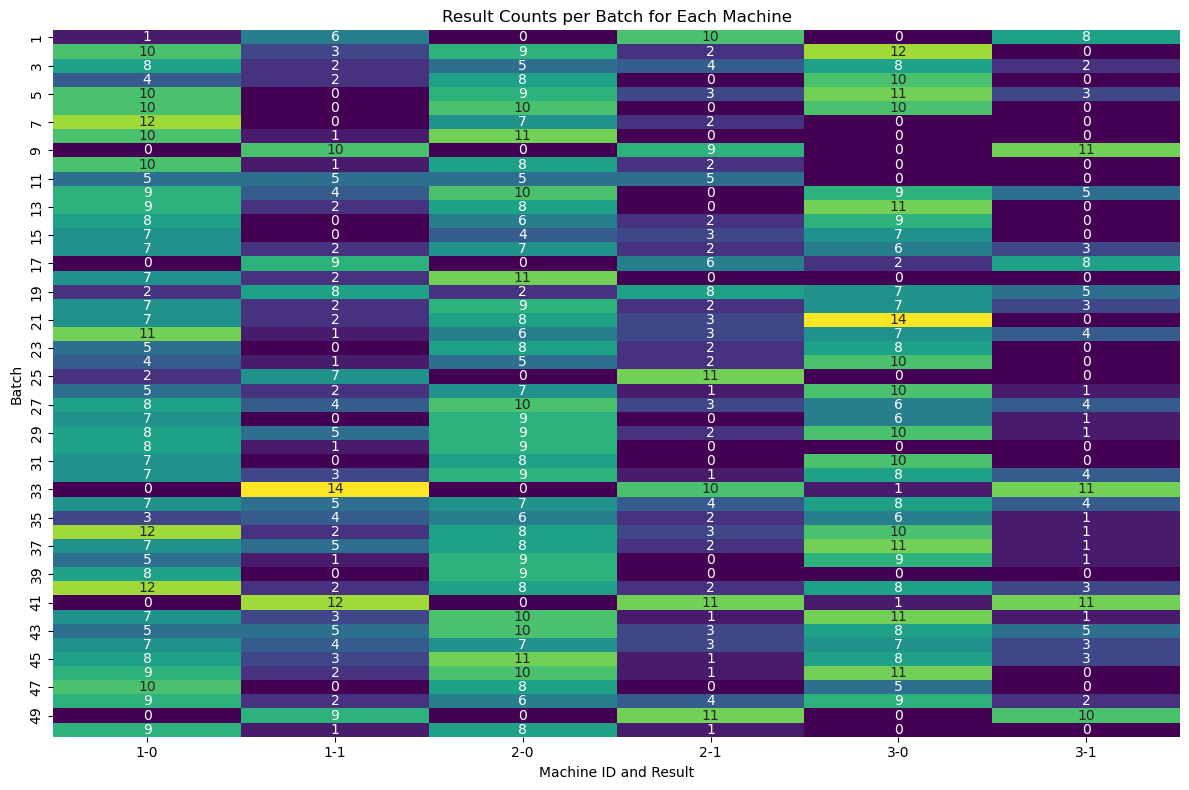

In [380]:
plt.figure(figsize=(12, 8))
sns.heatmap(result_matrix, cmap='viridis', annot=True, fmt='d', cbar=False)
plt.title('Result Counts per Batch for Each Machine')
plt.xlabel('Machine ID and Result')
plt.ylabel('Batch')
plt.tight_layout()
plt.show()

In [381]:
cross_table_1 = pd.crosstab(index=dfb['Batch'], columns=[dfb['machine_id'], dfb['Result']])

In [382]:
cross_table_1

machine_id   1       2       3    
Result       0   1   0   1   0   1
Batch                             
1            1   6   0  10   0   8
2           10   3   9   2  12   0
3            8   2   5   4   8   2
4            4   2   8   0  10   0
5           10   0   9   3  11   3
6           10   0  10   0  10   0
7           12   0   7   2   0   0
8           10   1  11   0   0   0
9            0  10   0   9   0  11
10          10   1   8   2   0   0
11           5   5   5   5   0   0
12           9   4  10   0   9   5
13           9   2   8   0  11   0
14           8   0   6   2   9   0
15           7   0   4   3   7   0
16           7   2   7   2   6   3
17           0   9   0   6   2   8
18           7   2  11   0   0   0
19           2   8   2   8   7   5
20           7   2   9   2   7   3
21           7   2   8   3  14   0
22          11   1   6   3   7   4
23           5   0   8   2   8   0
24           4   1   5   2  10   0
25           2   7   0  11   0   0
26           5   2   7   1  10   1
27           8   4  10   3   6   4
28           7   0   9   0   6   1
29           8   5   9   2  10   1
30           8   1   9   0   0   0
31           7   0   8   0  10   0
32           7   3   9   1   8   4
33           0  14   0  10   1  11
34           7   5   7   4   8   4
35           3   4   6   2   6   1
36          12   2   8   3  10   1
37           7   5   8   2  11   1
38           5   1   9   0   9   1
39           8   0   9   0   0   0
40          12   2   8   2   8   3
41           0  12   0  11   1  11
42           7   3  10   1  11   1
43           5   5  10   3   8   5
44           7   4   7   3   7   3
45           8   3  11   1   8   3
46           9   2  10   1  11   0
47          10   0   8   0   5   0
48           9   2   6   4   9   2
49           0   9   0  11   0  10
50           9   1   8   1   0   0

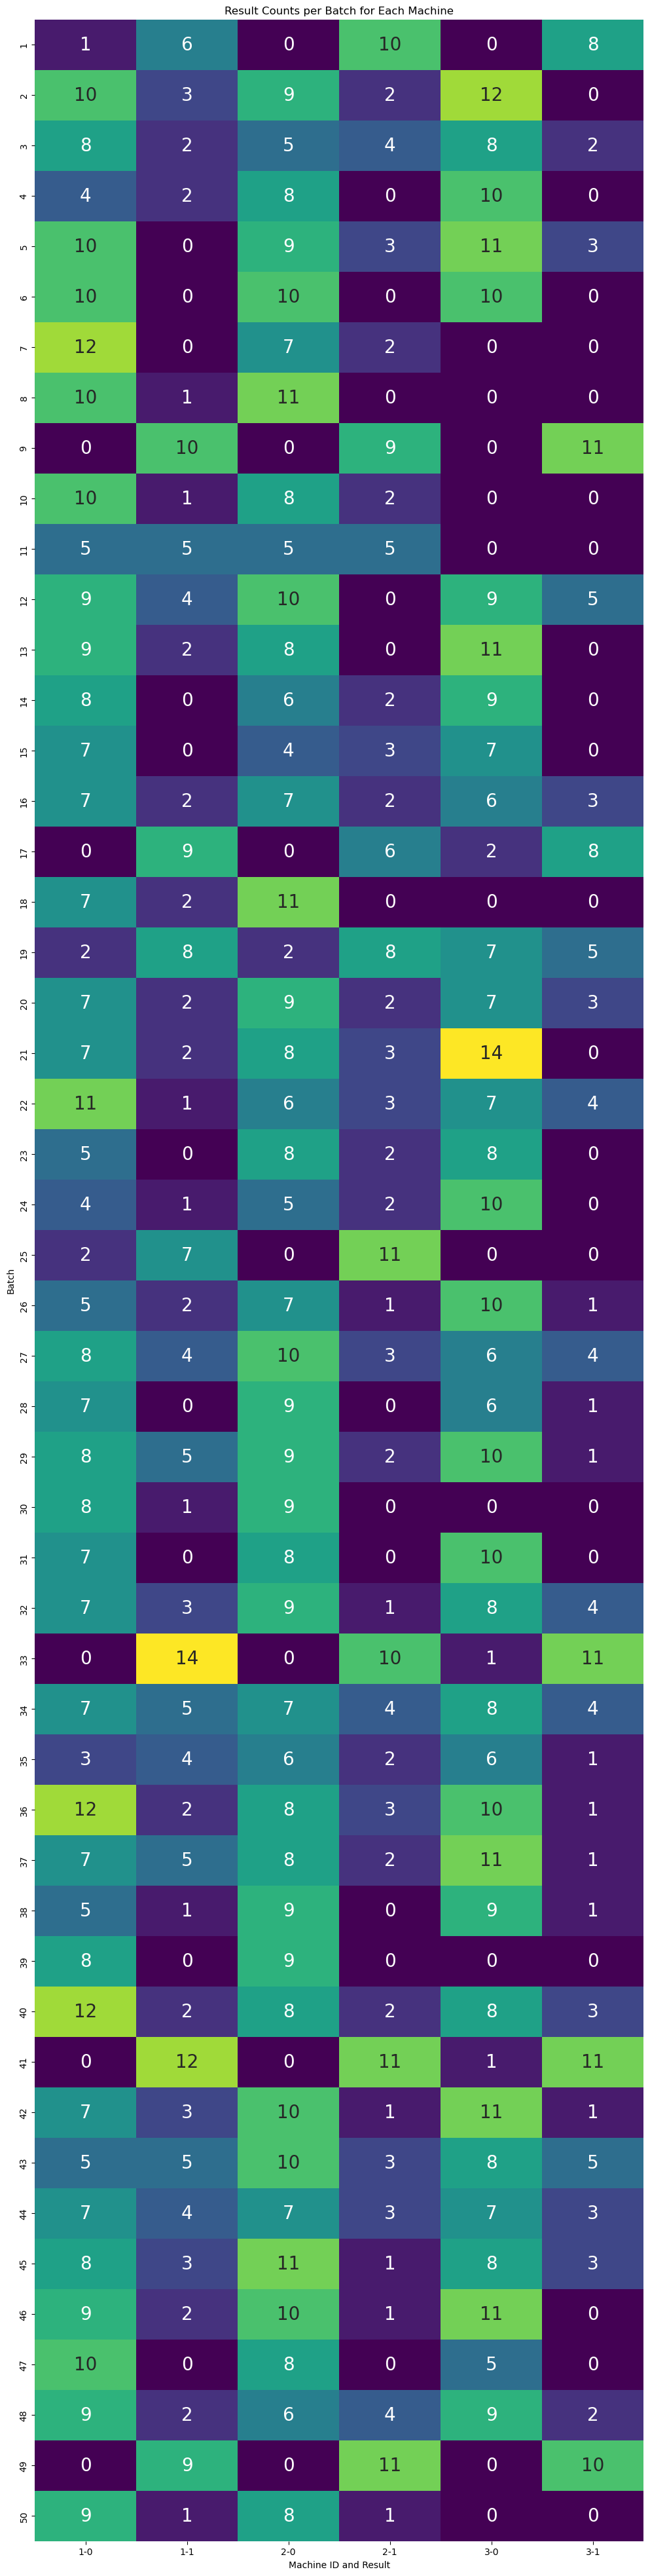

In [383]:
plt.figure(figsize=(12, 50))
sns.heatmap(cross_table_1, cmap='viridis', annot=True,annot_kws={'size':20}, fmt='d', cbar=False)
plt.title('Result Counts per Batch for Each Machine')
plt.xlabel('Machine ID and Result')
plt.ylabel('Batch')

plt.show()

In [405]:
cross_table_2 = pd.crosstab(index=dfb['Batch'], columns=[dfb['machine_id'], dfb['Result'],dfb.Supplier])

In [385]:
cross_table_2

machine_id   1               2               3            
Result       0       1       0       1       0       1    
Supplier     A   B   A   B   A   B   A   B   A   B   A   B
Batch                                                     
1            0   1   0   6   0   0   0  10   0   0   0   8
2           10   0   3   0   9   0   2   0  12   0   0   0
3            8   0   2   0   5   0   4   0   8   0   2   0
4            0   4   0   2   0   8   0   0   0  10   0   0
5           10   0   0   0   9   0   3   0  11   0   3   0
6           10   0   0   0  10   0   0   0  10   0   0   0
7           12   0   0   0   7   0   2   0   0   0   0   0
8           10   0   1   0  11   0   0   0   0   0   0   0
9            0   0   0  10   0   0   0   9   0   0   0  11
10           0  10   0   1   0   8   0   2   0   0   0   0
11           5   0   5   0   5   0   5   0   0   0   0   0
12           9   0   4   0  10   0   0   0   9   0   5   0
13           9   0   2   0   8   0   0   0  11   0   0   0
14           0   8   0   0   0   6   0   2   0   9   0   0
15           0   7   0   0   0   4   0   3   0   7   0   0
16           0   7   0   2   0   7   0   2   0   6   0   3
17           0   0   9   0   0   0   6   0   2   0   8   0
18           7   0   2   0  11   0   0   0   0   0   0   0
19           2   0   8   0   2   0   8   0   7   0   5   0
20           0   7   0   2   0   9   0   2   0   7   0   3
21           0   7   0   2   0   8   0   3   0  14   0   0
22          11   0   1   0   6   0   3   0   7   0   4   0
23           0   5   0   0   0   8   0   2   0   8   0   0
24           0   4   0   1   0   5   0   2   0  10   0   0
25           2   0   7   0   0   0  11   0   0   0   0   0
26           0   5   0   2   0   7   0   1   0  10   0   1
27           0   8   0   4   0  10   0   3   0   6   0   4
28           7   0   0   0   9   0   0   0   6   0   1   0
29           8   0   5   0   9   0   2   0  10   0   1   0
30           0   8   0   1   0   9   0   0   0   0   0   0
31           7   0   0   0   8   0   0   0  10   0   0   0
32           7   0   3   0   9   0   1   0   8   0   4   0
33           0   0  14   0   0   0  10   0   1   0  11   0
34           7   0   5   0   7   0   4   0   8   0   4   0
35           0   3   0   4   0   6   0   2   0   6   0   1
36          12   0   2   0   8   0   3   0  10   0   1   0
37           7   0   5   0   8   0   2   0  11   0   1   0
38           5   0   1   0   9   0   0   0   9   0   1   0
39           8   0   0   0   9   0   0   0   0   0   0   0
40          12   0   2   0   8   0   2   0   8   0   3   0
41           0   0  12   0   0   0  11   0   1   0  11   0
42           0   7   0   3   0  10   0   1   0  11   0   1
43           5   0   5   0  10   0   3   0   8   0   5   0
44           7   0   4   0   7   0   3   0   7   0   3   0
45           0   8   0   3   0  11   0   1   0   8   0   3
46           0   9   0   2   0  10   0   1   0  11   0   0
47          10   0   0   0   8   0   0   0   5   0   0   0
48           0   9   0   2   0   6   0   4   0   9   0   2
49           0   0   9   0   0   0  11   0   0   0  10   0
50           0   9   0   1   0   8   0   1   0   0   0   0

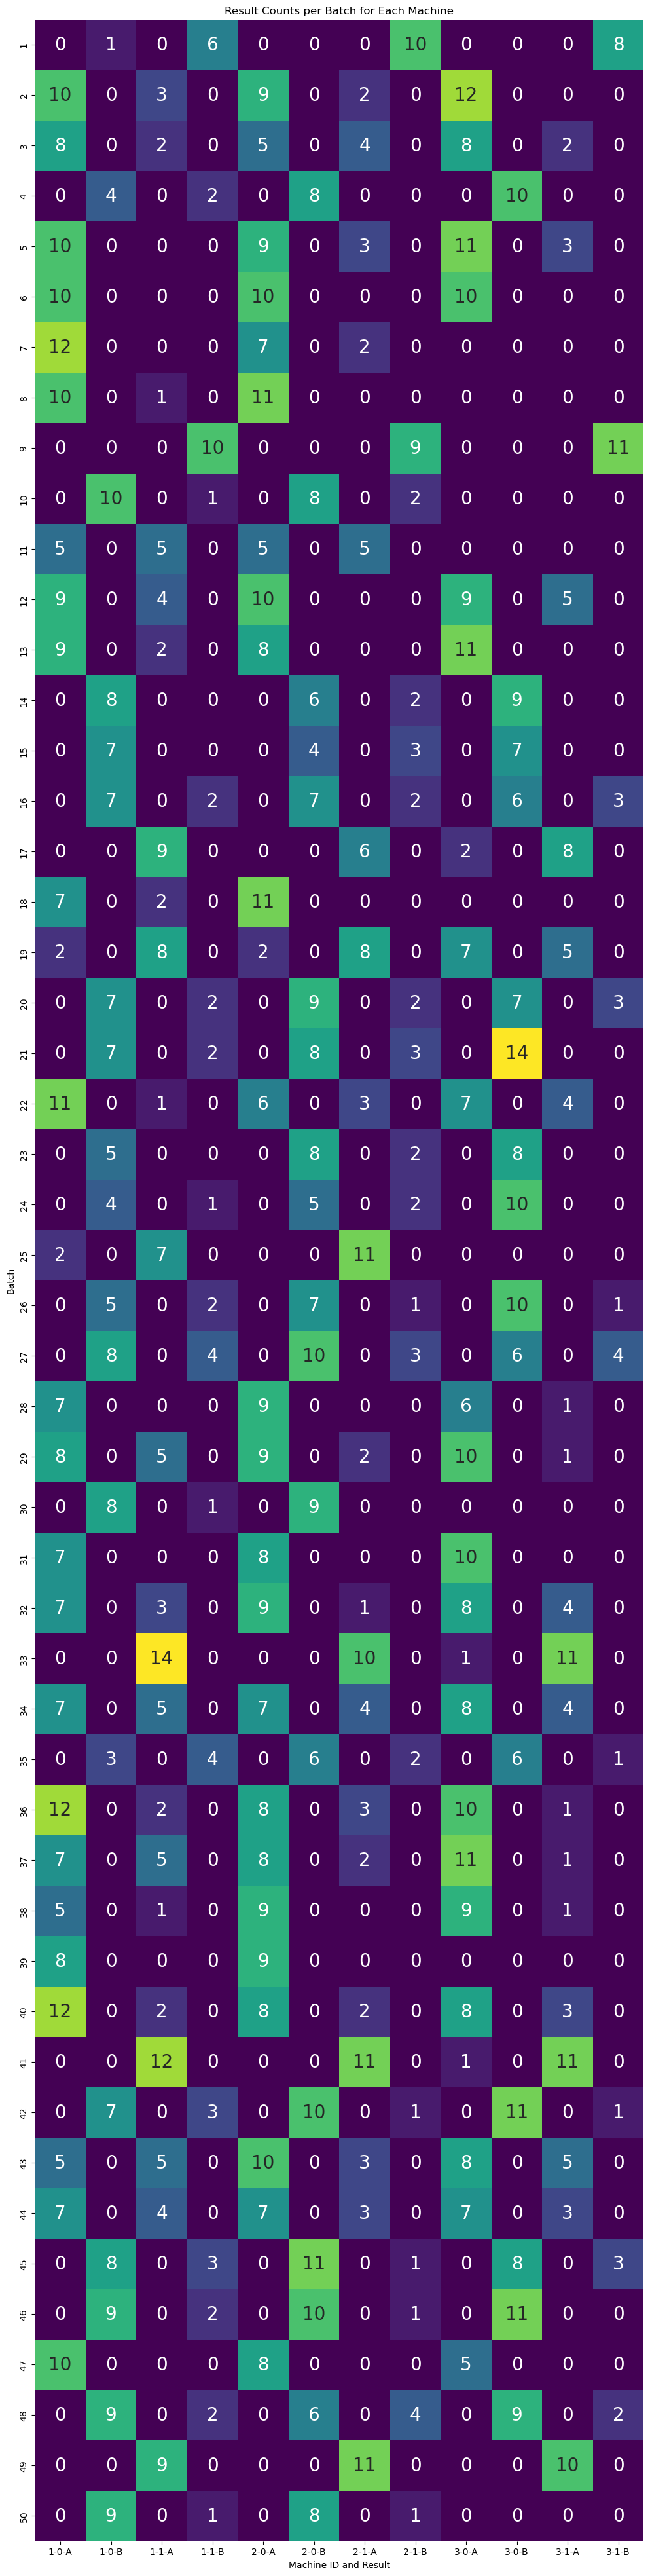

In [386]:
plt.figure(figsize=(12, 50))
sns.heatmap(cross_table_2, cmap='viridis', annot=True,annot_kws={'size':20}, fmt='d', cbar=False)
plt.title('Result Counts per Batch for Each Machine')
plt.xlabel('Machine ID and Result')
plt.ylabel('Batch')

plt.show()

In [388]:
dfb['Result']=dfb.Result.astype('int')

In [449]:
def proportion(x):
    if len(x)>0:
        return x.sum()/x.count()
    return 0

dfb.groupby(['Batch', 'machine_id']).\
aggregate(proportion = ('Result', proportion),
          proportion1 = ('Result', 'mean')).\
    reset_index()

Batch machine_id  proportion  proportion1
0       1          1    0.857143     0.857143
1       1          2    1.000000     1.000000
2       1          3    1.000000     1.000000
3       2          1    0.230769     0.230769
4       2          2    0.181818     0.181818
..    ...        ...         ...          ...
145    49          2    1.000000     1.000000
146    49          3    1.000000     1.000000
147    50          1    0.100000     0.100000
148    50          2    0.111111     0.111111
149    50          3         NaN          NaN

[150 rows x 4 columns]

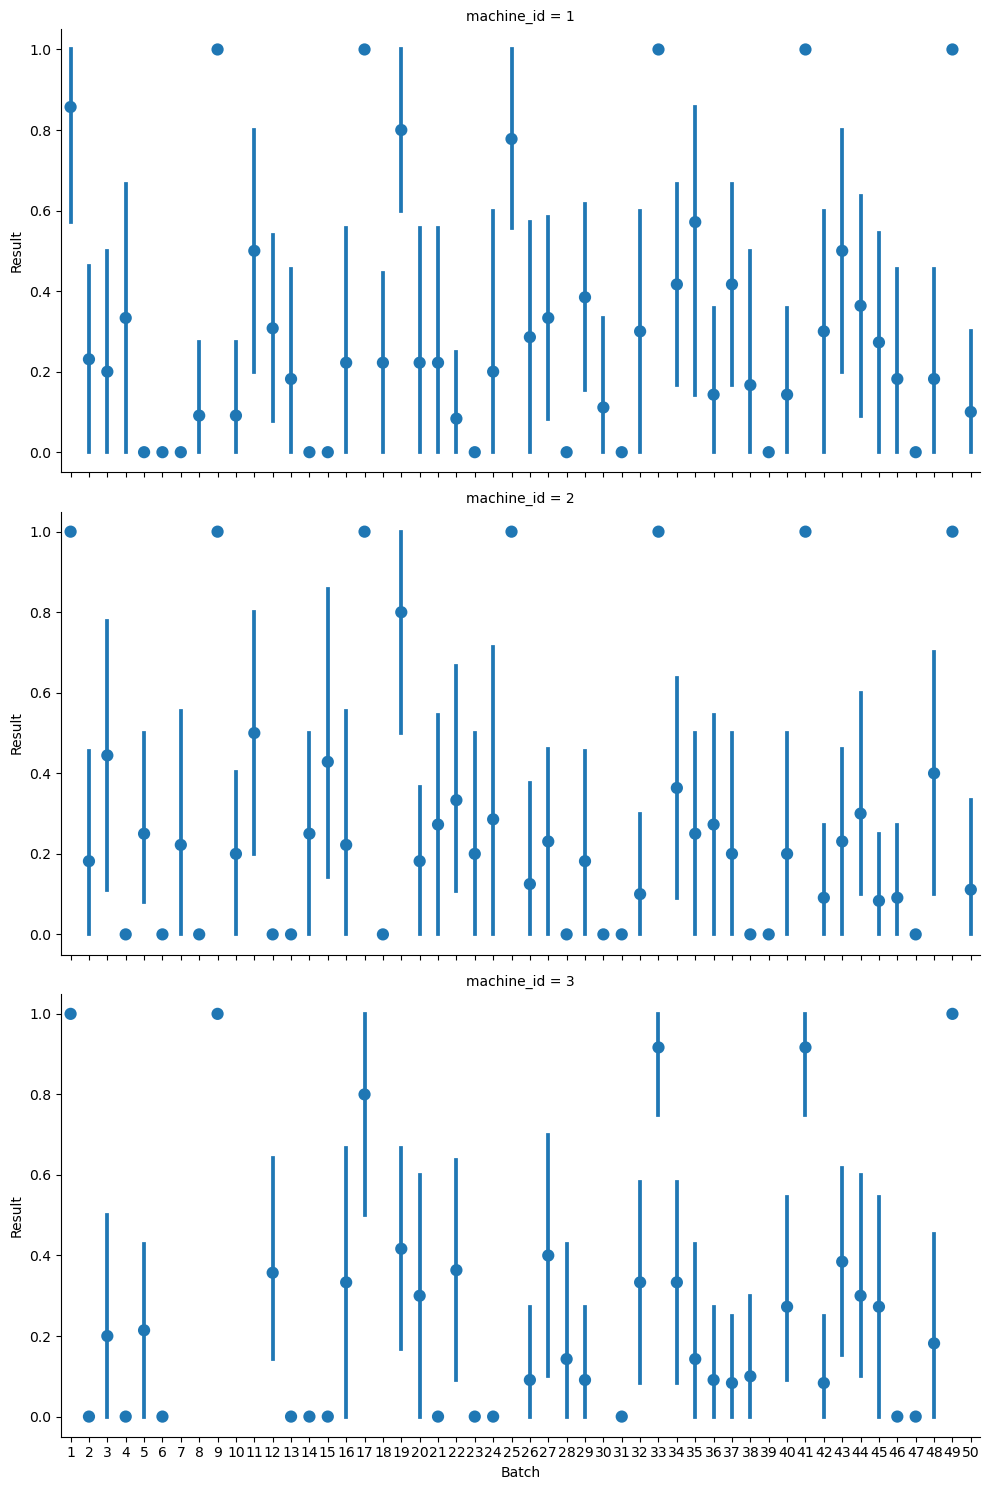

In [451]:
sns.catplot(data = dfb, x='Batch', y='Result', kind='point', row='machine_id', aspect=2, join=False)

plt.show()

In [448]:
dfb.groupby(['Batch', 'machine_id', 'Supplier'], dropna=False).\
aggregate(proportion = ('Result', proportion),
          proportion1 = ('Result', 'mean')).\
    reset_index()

Batch machine_id Supplier  proportion  proportion1
0       1          1        A         NaN          NaN
1       1          1        B    0.857143     0.857143
2       1          2        A         NaN          NaN
3       1          2        B    1.000000     1.000000
4       1          3        A         NaN          NaN
..    ...        ...      ...         ...          ...
295    50          1        B    0.100000     0.100000
296    50          2        A         NaN          NaN
297    50          2        B    0.111111     0.111111
298    50          3        A         NaN          NaN
299    50          3        B         NaN          NaN

[300 rows x 5 columns]

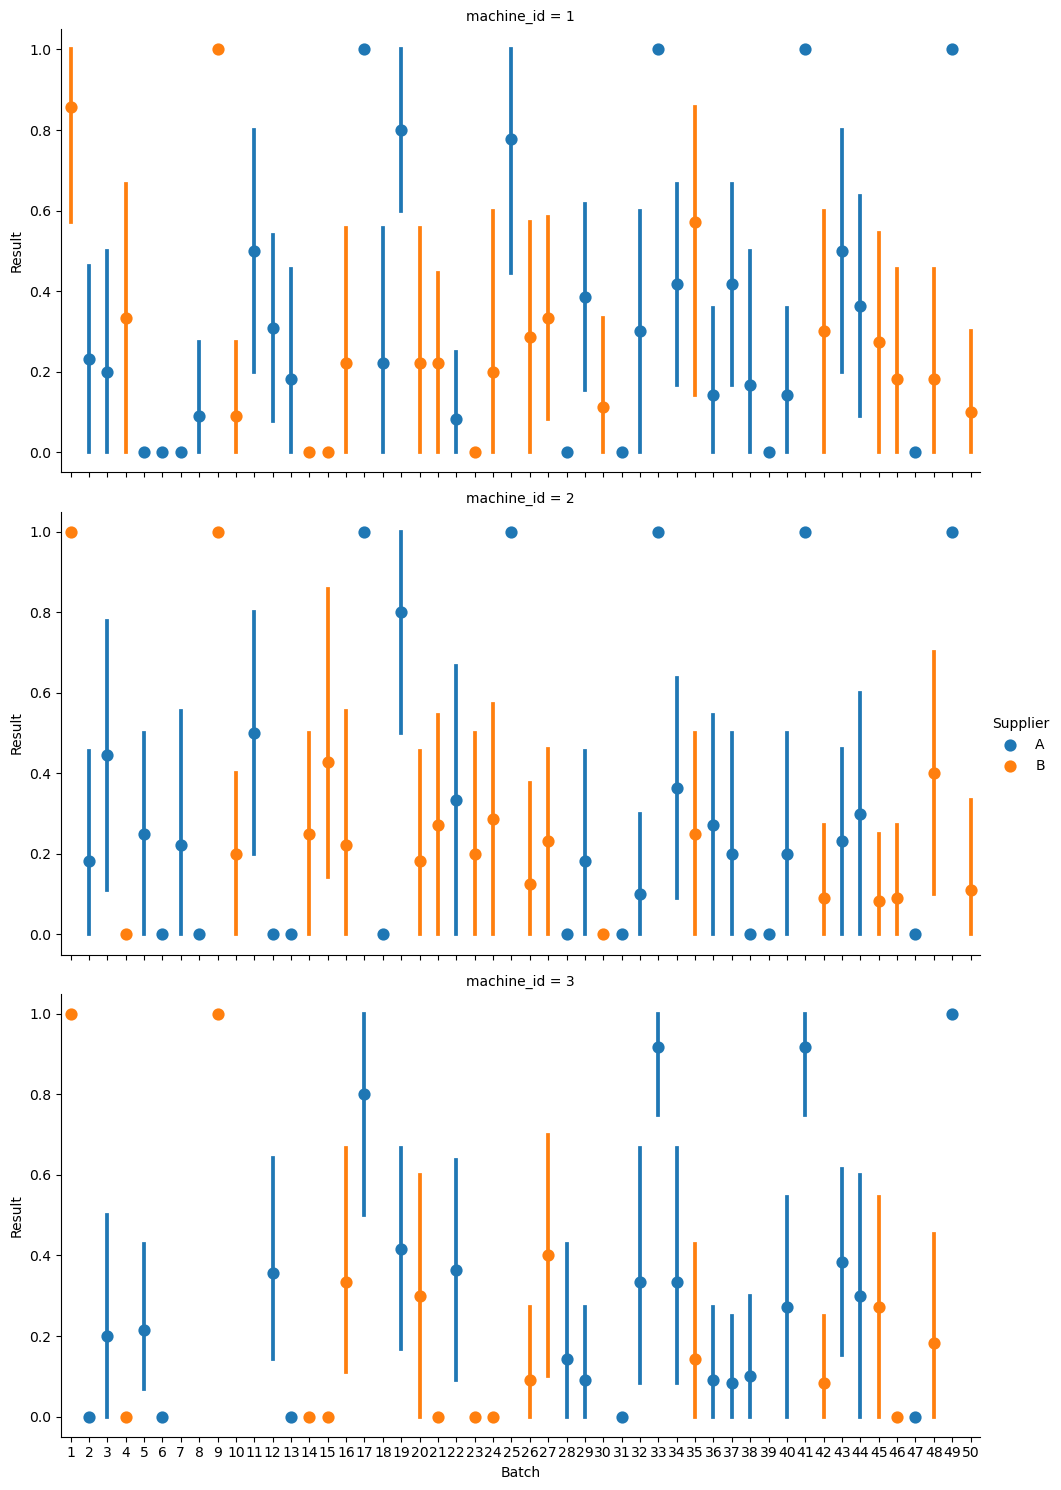

In [452]:
sns.catplot(data = dfb, x='Batch', y='Result', kind='point', row='machine_id',hue='Supplier', aspect=2, join=False)

plt.show()

## Problem 05

You must cluster the rows of `dfb` using the 4 operational variables `x1` through `x4`. You must decide how many clusters to use and describe how you made that choice. You may use KMeans OR Hierarchical clustering. Include any figures that helped you make that choice.

Visualize your cluster analysis results by:
* Plotting the number of observations per cluster.
* Visualizing the relationships between the operational variables GIVEN the cluster.

You are interested in the PROPORTION of cell phone cases that failed the DROP TEST. Are any of the clusters associated with higher failure PROPORTIONS than others? Based on your visualizations how would you describe that cluster?

Add as many cells as you see fit to answer this question.

#### SOLUTION

In [391]:
dfb.dtypes

ID                 object
Batch            category
s_id             category
x1                float64
x2                float64
x3                float64
x4                float64
machine_id       category
Supplier         category
Density           float64
test_group_id      object
Result              int64
dtype: object

In [392]:
dfb_feat=dfb.select_dtypes('number').copy()

In [395]:
dfb_feat=dfb_feat.drop(['Density', 'Result'], axis=1)

In [396]:
X=StandardScaler().fit_transform(dfb_feat)

In [397]:
hclust_ward= hierarchy.ward(X)

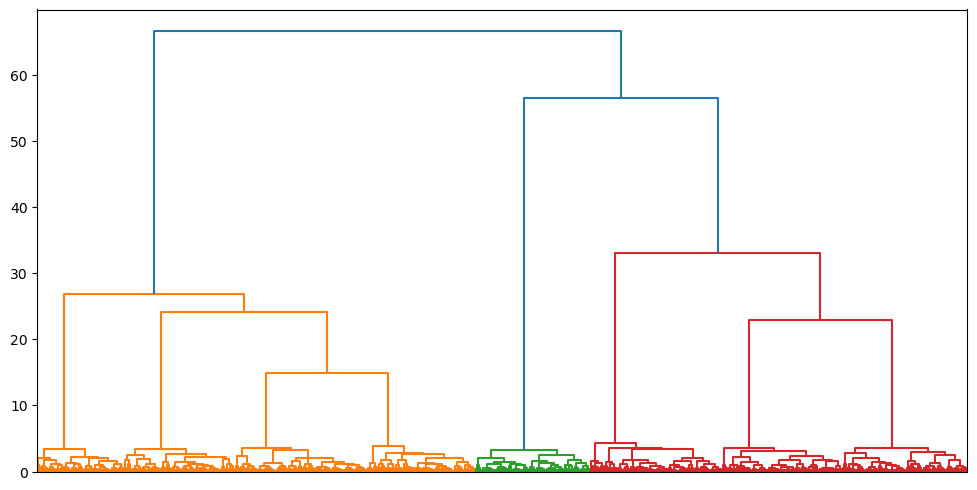

In [398]:
fig = plt.figure(figsize=(12,6))

dn=hierarchy.dendrogram(hclust_ward,no_labels=True)

plt.show()

I have chosen 3 clusters because I can see some space on the Y-axis where the number of clusters don't change frequently.

In [399]:
dfb['hclust_3']=pd.Series(hierarchy.cut_tree(hclust_ward, n_clusters=3).ravel(), index=dfb.index).astype('category')

In [431]:
dfb.hclust_3.value_counts().sort_index()

0    572
1    174
2    666
Name: hclust_3, dtype: int64

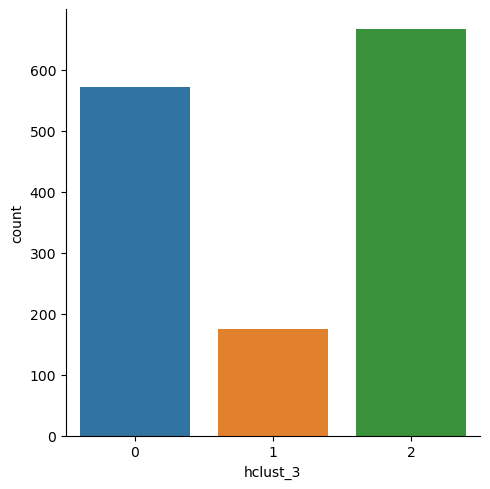

In [432]:
sns.catplot(data=dfb, x='hclust_3', kind='count')

In [436]:
dfb.dtypes

ID                 object
Batch            category
s_id             category
x1                float64
x2                float64
x3                float64
x4                float64
machine_id       category
Supplier         category
Density           float64
test_group_id      object
Result              int64
hclust_3         category
dtype: object

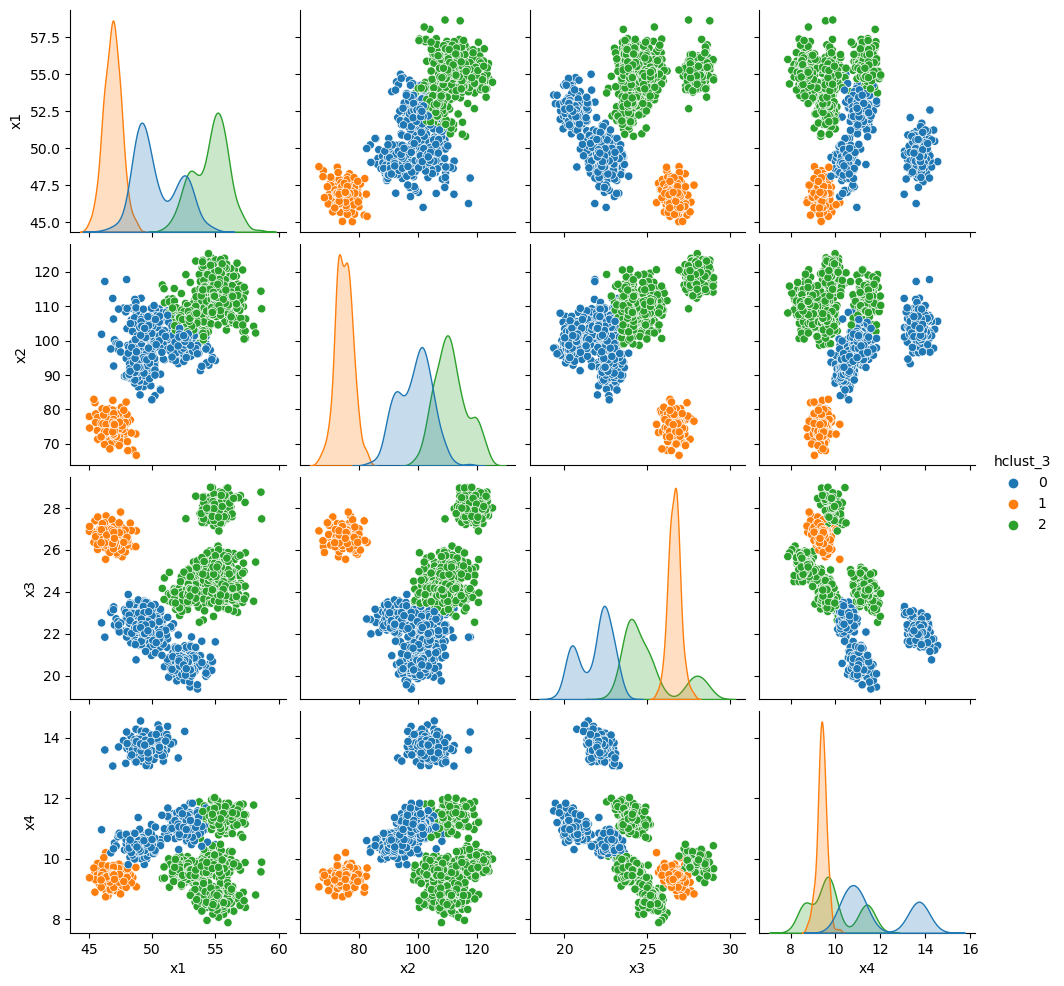

In [440]:
sns.pairplot(data=dfb[['x1','x2','x3','x4','hclust_3']], hue='hclust_3', diag_kws={'common_norm': False})

plt.show()

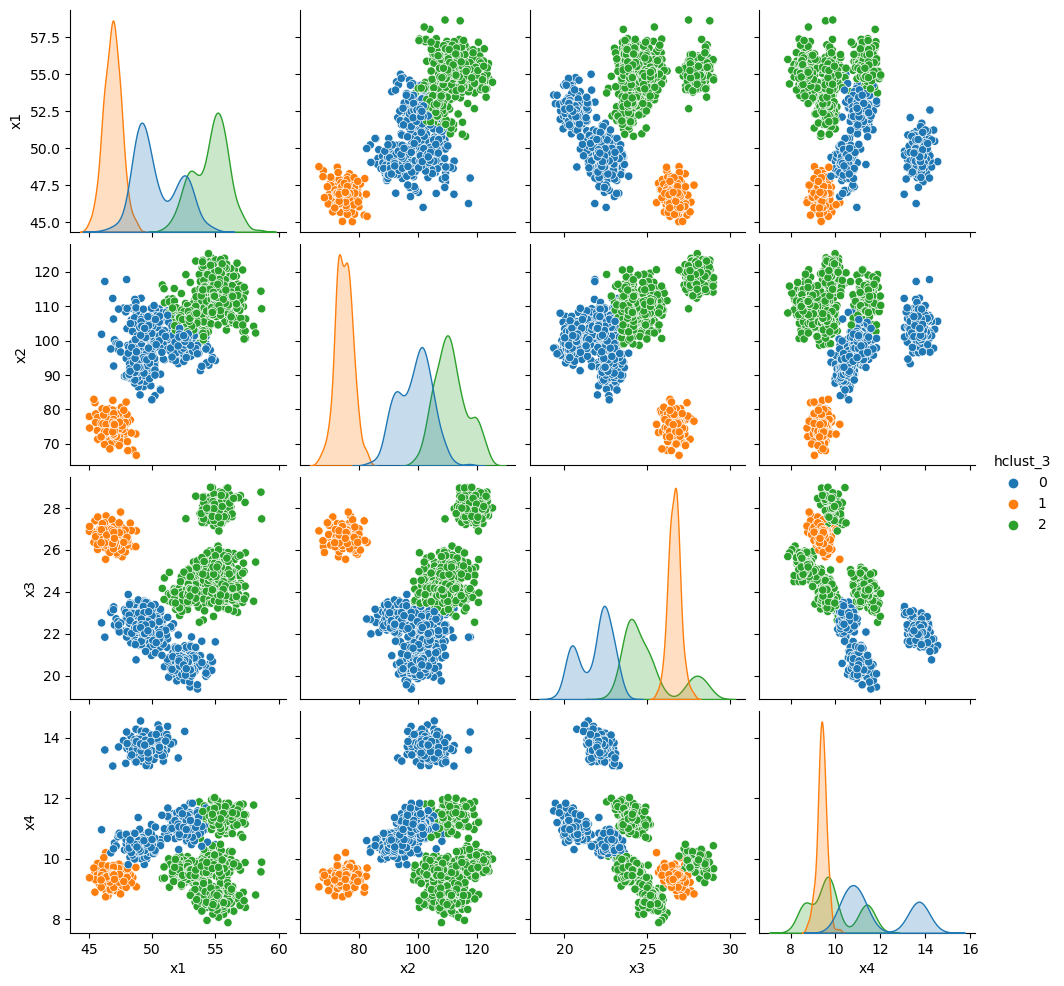

In [441]:
sns.pairplot(data=dfb.drop(columns=['Density', 'Result']), hue='hclust_3', diag_kws={'common_norm': False})

plt.show()

In [442]:
dfb.head()

ID Batch s_id         x1          x2         x3         x4  \
0  B001-M01-S002     1    2  46.887333  112.266102  23.197330  13.064709   
1  B001-M01-S024     1   24  51.531574  100.207219  22.281345  13.796810   
2  B001-M01-S030     1   30  48.306819  109.445722  22.910858  13.839830   
3  B001-M01-S038     1   38  52.058573   93.272568  21.937216  13.332882   
4  B001-M01-S048     1   48  50.564504  109.184587  22.083064  13.954942   

  machine_id Supplier    Density test_group_id  Result hclust_3  
0          1        B  10.388587           A-0       1        0  
1          1        B  10.388587           A-0       1        0  
2          1        B  10.388587           A-0       0        0  
3          1        B  10.388587           A-0       1        0  
4          1        B  10.388587           A-0       1        0

In [414]:
cross_table_final=pd.crosstab( dfb.hclust_3,dfb.Result, margins=True)

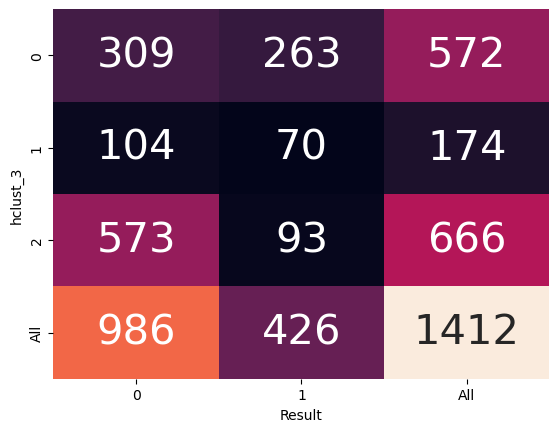

In [415]:
fig, axs=plt.subplots()

sns.heatmap(cross_table_final, annot=True, annot_kws={'size': 30}, cbar=False, ax=axs, fmt='g')

plt.show()

In [417]:
cross_table_final

Result      0    1   All
hclust_3                
0         309  263   572
1         104   70   174
2         573   93   666
All       986  426  1412

In [427]:
cross_table_final['proportion1']=cross_table_final[1]/cross_table_final['All'] # I found this trick later. So I thought to include it.

In [425]:
cross_table_final['proportion']=[cross_table_final.iloc[i,1]/cross_table_final.iloc[i,2] for i in range(4)]

In [426]:
cross_table_final

Result      0    1   All  proportion  proportion1
hclust_3                                         
0         309  263   572    0.459790     0.459790
1         104   70   174    0.402299     0.402299
2         573   93   666    0.139640     0.139640
All       986  426  1412    0.301700     0.301700

Cluster 0 has higher proportion of fails.